In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import confusion_matrix, accuracy_score
from timeit import default_timer as timer
import keras.models
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
#Data
df = pd.read_csv('diabetes.csv')
def convertToNa(x):
    if(x == 0):
        return
    else:
        return x
df['Glucose'] = df['Glucose'].apply(convertToNa)
df['BloodPressure'] = df['BloodPressure'].apply(convertToNa)
df['SkinThickness'] = df['SkinThickness'].apply(convertToNa)
df['Insulin'] = df['Insulin'].apply(convertToNa)
df['BMI'] = df['BMI'].apply(convertToNa)
df = df.dropna()
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.count()

Pregnancies                 392
Glucose                     392
BloodPressure               392
SkinThickness               392
Insulin                     392
BMI                         392
DiabetesPedigreeFunction    392
Age                         392
Outcome                     392
dtype: int64

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


In [5]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [7]:
y.head()

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

In [39]:
#Train_Test_Split & Scaling

"""def train_test_scale(a, b):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = a, random_state = b)
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test, y_train, y_test"""


'def train_test_scale(a, b):\n  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = a, random_state = b)\n  sc = StandardScaler()\n  X_train = sc.fit_transform(X_train)\n  X_test = sc.transform(X_test)\n  return X_train, X_test, y_train, y_test'

In [13]:
#Create ANN Class
class ANN_class:
  
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.test_size = 0.0
    self.random_state = 0
    self.accuracy = 0.00
    self.X_train = []
    self.y_train = []
    self.X_test = []
    self.y_test = []
    self.y_pred = []
    self.model = Sequential()
 
  def split_and_scale(self, i, j):
    self.test_size = i/100
    self.random_state = j
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
    sc = StandardScaler()
    self.X_train = sc.fit_transform(self.X_train)
    self.X_test = sc.transform(self.X_test)
    
  def make_model(self):
    # Adding the input layer and the first hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))    
    # Adding the second hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the third hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the output layer
    self.model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))    
    # Compiling the ANN
    self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return self.model
  
  def train_model(self, m, n):
    self.model.fit(self.X_train, self.y_train, batch_size = m, epochs = n)
    return self.model
 
  '''def train_model(self, X_train, y_train, m, n): 
    self.model.fit(X_train, y_train, batch_size = m, epochs = n)'''
  
  def get_y_pred(self):
    self.y_pred = self.model.predict(self.X_test)
    return self.y_pred
  
  def get_accuracy(self):
    self.accuracy = accuracy_score(self.y_test, self.y_pred.round()) #Round had to be used as last layer is sigmoid (ValueError: Classification metrics can't handle a mix of binary and continuous targets)
    return self.accuracy
  
  def everything(self, i, j, m, n):
    self.split_and_scale(i, j)
    self.make_model()
    self.train_model(m, n)
    self.get_y_pred()
    self.get_accuracy()

In [14]:
i_Best = 0
j_Best = 0
m_Best = 0
n_Best = 0
accuracy_Best = 0.00

In [15]:
#Finding the most accurate ANN by looping test_size, random_state, batch_size & epochs
#Should this be done AFTER GridSearchCV instead?

start = timer()

for i in range(20, 35, 5):
  for j in range(0, 101):
    for m in range(10, 30, 10):
      for n in range(50, 350, 50):
        ANN_loop_1 = ANN_class(X, y)
        ANN_loop_1.everything(i, j, m, n)
        if ANN_loop_1.accuracy > accuracy_Best:
            i_Best = i
            j_Best = j
            m_Best = m
            n_Best = n
            accuracy_Best = ANN_loop_1.accuracy
        print("test_size: {0} | random_state: {1} | batch_size: {2} | epochs: {3} | Accuracy {4}".format(i, j, m, n, ANN_loop_1.accuracy))

print("Best Model: \n test_size {0} | random_state {1} | batch_size {2} | epochs {3} | accuracy {4}".format(i_Best, j_Best, m_Best, n_Best, accuracy_Best))

dt = timer() - start
dt_hrs = int(dt / 3600)
dt_mins = int(dt / 60)
dt_s = dt % 60
print("This loop took {0} hours {1} minutes {2} seconds".format(dt_hrs, dt_mins, dt_s))



W1110 20:14:01.984875 13304 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1110 20:14:02.019560 13304 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1110 20:14:02.023151 13304 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1110 20:14:02.115731 13304 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1110 20:14:02.150355 13304 deprecation_wrapper.py:119] From C:\ProgramData\Anac

Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.6905 - acc: 0.6358
Epoch 2/50
313/313 [==============================] - 0s 250us/step - loss: 0.6702 - acc: 0.6645
Epoch 3/50
313/313 [==============================] - 0s 277us/step - loss: 0.5766 - acc: 0.6773
Epoch 4/50
313/313 [==============================] - 0s 284us/step - loss: 0.5000 - acc: 0.7636
Epoch 5/50
313/313 [==============================] - 0s 258us/step - loss: 0.4696 - acc: 0.7796
Epoch 6/50
313/313 [==============================] - 0s 251us/step - loss: 0.4508 - acc: 0.7891
Epoch 7/50
313/313 [==============================] - 0s 268us/step - loss: 0.4402 - acc: 0.7955
Epoch 8/50
313/313 [==============================] - 0s 246us/step - loss: 0.4368 - acc: 0.7987
Epoch 9/50
313/313 [==============================] - 0s 260us/step - loss: 0.4335 - acc: 0.8019
Epoch 10/50
313/313 [==============================] - 0s 270us/step - loss: 0.4321 - acc: 0.8051
Epoch 11/50
313/313 [==========

313/313 [==============================] - 0s 245us/step - loss: 0.3859 - acc: 0.8307
Epoch 34/100
313/313 [==============================] - 0s 252us/step - loss: 0.3893 - acc: 0.8371
Epoch 35/100
313/313 [==============================] - 0s 253us/step - loss: 0.3848 - acc: 0.8307
Epoch 36/100
313/313 [==============================] - 0s 244us/step - loss: 0.3833 - acc: 0.8307
Epoch 37/100
313/313 [==============================] - 0s 241us/step - loss: 0.3794 - acc: 0.8403
Epoch 38/100
313/313 [==============================] - 0s 254us/step - loss: 0.3809 - acc: 0.8371
Epoch 39/100
313/313 [==============================] - 0s 242us/step - loss: 0.3803 - acc: 0.8435
Epoch 40/100
313/313 [==============================] - 0s 252us/step - loss: 0.3788 - acc: 0.8403
Epoch 41/100
313/313 [==============================] - 0s 250us/step - loss: 0.3800 - acc: 0.8371
Epoch 42/100
313/313 [==============================] - 0s 254us/step - loss: 0.3819 - acc: 0.8243
Epoch 43/100
313/313 [=

313/313 [==============================] - 0s 264us/step - loss: 0.4136 - acc: 0.8115
Epoch 16/150
313/313 [==============================] - 0s 266us/step - loss: 0.4102 - acc: 0.8147
Epoch 17/150
313/313 [==============================] - 0s 262us/step - loss: 0.4074 - acc: 0.8243
Epoch 18/150
313/313 [==============================] - 0s 248us/step - loss: 0.4099 - acc: 0.8147
Epoch 19/150
313/313 [==============================] - 0s 266us/step - loss: 0.4108 - acc: 0.8275
Epoch 20/150
313/313 [==============================] - 0s 262us/step - loss: 0.4028 - acc: 0.8211
Epoch 21/150
313/313 [==============================] - 0s 266us/step - loss: 0.4030 - acc: 0.8211
Epoch 22/150
313/313 [==============================] - 0s 262us/step - loss: 0.4009 - acc: 0.8243
Epoch 23/150
313/313 [==============================] - 0s 273us/step - loss: 0.3978 - acc: 0.8275
Epoch 24/150
313/313 [==============================] - 0s 254us/step - loss: 0.3979 - acc: 0.8211
Epoch 25/150
313/313 [=

313/313 [==============================] - 0s 249us/step - loss: 0.3096 - acc: 0.8722
Epoch 98/150
313/313 [==============================] - 0s 258us/step - loss: 0.3016 - acc: 0.8786
Epoch 99/150
313/313 [==============================] - 0s 249us/step - loss: 0.3027 - acc: 0.8690
Epoch 100/150
313/313 [==============================] - 0s 252us/step - loss: 0.3001 - acc: 0.8754
Epoch 101/150
313/313 [==============================] - 0s 245us/step - loss: 0.3024 - acc: 0.8754
Epoch 102/150
313/313 [==============================] - 0s 254us/step - loss: 0.2974 - acc: 0.8882
Epoch 103/150
313/313 [==============================] - 0s 257us/step - loss: 0.2981 - acc: 0.8754
Epoch 104/150
313/313 [==============================] - 0s 244us/step - loss: 0.2980 - acc: 0.8754
Epoch 105/150
313/313 [==============================] - 0s 250us/step - loss: 0.2913 - acc: 0.8914
Epoch 106/150
313/313 [==============================] - 0s 269us/step - loss: 0.2906 - acc: 0.8786
Epoch 107/150
31

313/313 [==============================] - 0s 277us/step - loss: 0.3903 - acc: 0.8211
Epoch 29/200
313/313 [==============================] - 0s 299us/step - loss: 0.3895 - acc: 0.8211
Epoch 30/200
313/313 [==============================] - 0s 282us/step - loss: 0.3876 - acc: 0.8275
Epoch 31/200
313/313 [==============================] - 0s 272us/step - loss: 0.3839 - acc: 0.8371
Epoch 32/200
313/313 [==============================] - 0s 269us/step - loss: 0.3857 - acc: 0.8339
Epoch 33/200
313/313 [==============================] - 0s 288us/step - loss: 0.3848 - acc: 0.8371
Epoch 34/200
313/313 [==============================] - 0s 269us/step - loss: 0.3847 - acc: 0.8371
Epoch 35/200
313/313 [==============================] - 0s 268us/step - loss: 0.3854 - acc: 0.8339
Epoch 36/200
313/313 [==============================] - 0s 275us/step - loss: 0.3824 - acc: 0.8307
Epoch 37/200
313/313 [==============================] - 0s 290us/step - loss: 0.3799 - acc: 0.8371
Epoch 38/200
313/313 [=

313/313 [==============================] - 0s 256us/step - loss: 0.2723 - acc: 0.8946
Epoch 111/200
313/313 [==============================] - 0s 254us/step - loss: 0.2669 - acc: 0.8978
Epoch 112/200
313/313 [==============================] - 0s 252us/step - loss: 0.2693 - acc: 0.9010
Epoch 113/200
313/313 [==============================] - 0s 246us/step - loss: 0.2686 - acc: 0.8946
Epoch 114/200
313/313 [==============================] - 0s 245us/step - loss: 0.2623 - acc: 0.9010
Epoch 115/200
313/313 [==============================] - 0s 252us/step - loss: 0.2720 - acc: 0.8978
Epoch 116/200
313/313 [==============================] - 0s 250us/step - loss: 0.2609 - acc: 0.8946
Epoch 117/200
313/313 [==============================] - 0s 248us/step - loss: 0.2555 - acc: 0.9010
Epoch 118/200
313/313 [==============================] - 0s 256us/step - loss: 0.2527 - acc: 0.9010
Epoch 119/200
313/313 [==============================] - 0s 241us/step - loss: 0.2710 - acc: 0.8946
Epoch 120/200


313/313 [==============================] - 0s 244us/step - loss: 0.1410 - acc: 0.9297
Epoch 193/200
313/313 [==============================] - 0s 252us/step - loss: 0.1338 - acc: 0.9329
Epoch 194/200
313/313 [==============================] - 0s 243us/step - loss: 0.1291 - acc: 0.9297
Epoch 195/200
313/313 [==============================] - 0s 239us/step - loss: 0.1231 - acc: 0.9297
Epoch 196/200
313/313 [==============================] - 0s 239us/step - loss: 0.1232 - acc: 0.9329
Epoch 197/200
313/313 [==============================] - 0s 232us/step - loss: 0.1256 - acc: 0.9329
Epoch 198/200
313/313 [==============================] - 0s 244us/step - loss: 0.1247 - acc: 0.9297
Epoch 199/200
313/313 [==============================] - 0s 241us/step - loss: 0.1478 - acc: 0.9105
Epoch 200/200
313/313 [==============================] - 0s 253us/step - loss: 0.2323 - acc: 0.8978
test_size: 20 | random_state: 0 | batch_size: 10 | epochs: 200 | Accuracy 0.7721518987341772
Epoch 1/250
313/313 [

Epoch 74/250
313/313 [==============================] - 0s 266us/step - loss: 0.2847 - acc: 0.8946
Epoch 75/250
313/313 [==============================] - 0s 270us/step - loss: 0.2928 - acc: 0.8882
Epoch 76/250
313/313 [==============================] - 0s 252us/step - loss: 0.2937 - acc: 0.8882
Epoch 77/250
313/313 [==============================] - 0s 249us/step - loss: 0.2833 - acc: 0.8786
Epoch 78/250
313/313 [==============================] - 0s 258us/step - loss: 0.2780 - acc: 0.8946
Epoch 79/250
313/313 [==============================] - 0s 253us/step - loss: 0.2790 - acc: 0.8914
Epoch 80/250
313/313 [==============================] - 0s 257us/step - loss: 0.2899 - acc: 0.8786
Epoch 81/250
313/313 [==============================] - 0s 263us/step - loss: 0.2748 - acc: 0.8978
Epoch 82/250
313/313 [==============================] - 0s 258us/step - loss: 0.2804 - acc: 0.8882
Epoch 83/250
313/313 [==============================] - 0s 277us/step - loss: 0.2773 - acc: 0.8946
Epoch 84/2

313/313 [==============================] - 0s 255us/step - loss: 0.1317 - acc: 0.9425
Epoch 157/250
313/313 [==============================] - 0s 250us/step - loss: 0.1340 - acc: 0.9393
Epoch 158/250
313/313 [==============================] - 0s 257us/step - loss: 0.1392 - acc: 0.9393
Epoch 159/250
313/313 [==============================] - 0s 262us/step - loss: 0.1319 - acc: 0.9425
Epoch 160/250
313/313 [==============================] - 0s 257us/step - loss: 0.1258 - acc: 0.9425
Epoch 161/250
313/313 [==============================] - 0s 265us/step - loss: 0.1281 - acc: 0.9393
Epoch 162/250
313/313 [==============================] - 0s 266us/step - loss: 0.1248 - acc: 0.9425
Epoch 163/250
313/313 [==============================] - 0s 246us/step - loss: 0.1226 - acc: 0.9425
Epoch 164/250
313/313 [==============================] - 0s 247us/step - loss: 0.1210 - acc: 0.9425
Epoch 165/250
313/313 [==============================] - 0s 262us/step - loss: 0.1208 - acc: 0.9425
Epoch 166/250


313/313 [==============================] - 0s 270us/step - loss: 0.1999 - acc: 0.9361
Epoch 239/250
313/313 [==============================] - 0s 246us/step - loss: 0.1655 - acc: 0.9489
Epoch 240/250
313/313 [==============================] - 0s 259us/step - loss: 0.1070 - acc: 0.9553
Epoch 241/250
313/313 [==============================] - 0s 251us/step - loss: 0.0714 - acc: 0.9776
Epoch 242/250
313/313 [==============================] - 0s 267us/step - loss: 0.0671 - acc: 0.9712
Epoch 243/250
313/313 [==============================] - 0s 276us/step - loss: 0.0634 - acc: 0.9617
Epoch 244/250
313/313 [==============================] - 0s 286us/step - loss: 0.0601 - acc: 0.9712
Epoch 245/250
313/313 [==============================] - 0s 254us/step - loss: 0.0576 - acc: 0.9776
Epoch 246/250
313/313 [==============================] - 0s 250us/step - loss: 0.0561 - acc: 0.9776
Epoch 247/250
313/313 [==============================] - 0s 258us/step - loss: 0.0580 - acc: 0.9712
Epoch 248/250


313/313 [==============================] - 0s 222us/step - loss: 0.3347 - acc: 0.8562
Epoch 70/300
313/313 [==============================] - 0s 312us/step - loss: 0.3358 - acc: 0.8562
Epoch 71/300
313/313 [==============================] - 0s 280us/step - loss: 0.3342 - acc: 0.8594
Epoch 72/300
313/313 [==============================] - 0s 259us/step - loss: 0.3299 - acc: 0.8658
Epoch 73/300
313/313 [==============================] - 0s 243us/step - loss: 0.3382 - acc: 0.8498
Epoch 74/300
313/313 [==============================] - 0s 259us/step - loss: 0.3238 - acc: 0.8626
Epoch 75/300
313/313 [==============================] - 0s 270us/step - loss: 0.3192 - acc: 0.8722
Epoch 76/300
313/313 [==============================] - 0s 256us/step - loss: 0.3180 - acc: 0.8786
Epoch 77/300
313/313 [==============================] - 0s 258us/step - loss: 0.3179 - acc: 0.8690
Epoch 78/300
313/313 [==============================] - 0s 248us/step - loss: 0.3254 - acc: 0.8658
Epoch 79/300
313/313 [=

313/313 [==============================] - 0s 263us/step - loss: 0.1516 - acc: 0.9297
Epoch 152/300
313/313 [==============================] - 0s 245us/step - loss: 0.1511 - acc: 0.9361
Epoch 153/300
313/313 [==============================] - 0s 246us/step - loss: 0.1531 - acc: 0.9297
Epoch 154/300
313/313 [==============================] - 0s 265us/step - loss: 0.1784 - acc: 0.9265
Epoch 155/300
313/313 [==============================] - 0s 261us/step - loss: 0.1781 - acc: 0.9233
Epoch 156/300
313/313 [==============================] - 0s 239us/step - loss: 0.1960 - acc: 0.9105
Epoch 157/300
313/313 [==============================] - 0s 257us/step - loss: 0.1691 - acc: 0.9297
Epoch 158/300
313/313 [==============================] - 0s 249us/step - loss: 0.1678 - acc: 0.9233
Epoch 159/300
313/313 [==============================] - 0s 251us/step - loss: 0.1465 - acc: 0.9425
Epoch 160/300
313/313 [==============================] - 0s 242us/step - loss: 0.1388 - acc: 0.9393
Epoch 161/300


313/313 [==============================] - 0s 253us/step - loss: 0.0426 - acc: 0.9872
Epoch 234/300
313/313 [==============================] - 0s 248us/step - loss: 0.0425 - acc: 0.9872
Epoch 235/300
313/313 [==============================] - 0s 250us/step - loss: 0.0406 - acc: 0.9904
Epoch 236/300
313/313 [==============================] - 0s 248us/step - loss: 0.0447 - acc: 0.9872
Epoch 237/300
313/313 [==============================] - 0s 247us/step - loss: 0.0400 - acc: 0.9936
Epoch 238/300
313/313 [==============================] - 0s 247us/step - loss: 0.0351 - acc: 0.9904
Epoch 239/300
313/313 [==============================] - 0s 237us/step - loss: 0.0342 - acc: 0.9936
Epoch 240/300
313/313 [==============================] - 0s 237us/step - loss: 0.0342 - acc: 0.9904
Epoch 241/300
313/313 [==============================] - 0s 251us/step - loss: 0.0318 - acc: 0.9936
Epoch 242/300
313/313 [==============================] - 0s 289us/step - loss: 0.0351 - acc: 0.9872
Epoch 243/300


313/313 [==============================] - 0s 148us/step - loss: 0.4347 - acc: 0.8019
Epoch 15/50
313/313 [==============================] - 0s 142us/step - loss: 0.4356 - acc: 0.8051
Epoch 16/50
313/313 [==============================] - 0s 128us/step - loss: 0.4294 - acc: 0.7987
Epoch 17/50
313/313 [==============================] - 0s 139us/step - loss: 0.4280 - acc: 0.7955
Epoch 18/50
313/313 [==============================] - 0s 156us/step - loss: 0.4268 - acc: 0.8019
Epoch 19/50
313/313 [==============================] - 0s 153us/step - loss: 0.4237 - acc: 0.8051
Epoch 20/50
313/313 [==============================] - 0s 146us/step - loss: 0.4192 - acc: 0.7955
Epoch 21/50
313/313 [==============================] - 0s 143us/step - loss: 0.4154 - acc: 0.8083
Epoch 22/50
313/313 [==============================] - 0s 137us/step - loss: 0.4145 - acc: 0.8083
Epoch 23/50
313/313 [==============================] - 0s 170us/step - loss: 0.4078 - acc: 0.8083
Epoch 24/50
313/313 [===========

313/313 [==============================] - 0s 138us/step - loss: 0.3741 - acc: 0.8403
Epoch 47/100
313/313 [==============================] - 0s 150us/step - loss: 0.3740 - acc: 0.8435
Epoch 48/100
313/313 [==============================] - 0s 151us/step - loss: 0.3705 - acc: 0.8371
Epoch 49/100
313/313 [==============================] - 0s 135us/step - loss: 0.3701 - acc: 0.8466
Epoch 50/100
313/313 [==============================] - 0s 146us/step - loss: 0.3676 - acc: 0.8530
Epoch 51/100
313/313 [==============================] - 0s 133us/step - loss: 0.3681 - acc: 0.8466
Epoch 52/100
313/313 [==============================] - 0s 144us/step - loss: 0.3657 - acc: 0.8498
Epoch 53/100
313/313 [==============================] - 0s 137us/step - loss: 0.3630 - acc: 0.8466
Epoch 54/100
313/313 [==============================] - 0s 129us/step - loss: 0.3658 - acc: 0.8466
Epoch 55/100
313/313 [==============================] - 0s 145us/step - loss: 0.3632 - acc: 0.8435
Epoch 56/100
313/313 [=

313/313 [==============================] - 0s 138us/step - loss: 0.3964 - acc: 0.8211
Epoch 29/150
313/313 [==============================] - 0s 153us/step - loss: 0.3949 - acc: 0.8243
Epoch 30/150
313/313 [==============================] - 0s 151us/step - loss: 0.3928 - acc: 0.8307
Epoch 31/150
313/313 [==============================] - 0s 144us/step - loss: 0.3916 - acc: 0.8243
Epoch 32/150
313/313 [==============================] - 0s 128us/step - loss: 0.3902 - acc: 0.8371
Epoch 33/150
313/313 [==============================] - 0s 129us/step - loss: 0.3886 - acc: 0.8339
Epoch 34/150
313/313 [==============================] - 0s 145us/step - loss: 0.3866 - acc: 0.8307
Epoch 35/150
313/313 [==============================] - 0s 164us/step - loss: 0.3876 - acc: 0.8211
Epoch 36/150
313/313 [==============================] - 0s 152us/step - loss: 0.3873 - acc: 0.8243
Epoch 37/150
313/313 [==============================] - 0s 140us/step - loss: 0.3860 - acc: 0.8307
Epoch 38/150
313/313 [=

313/313 [==============================] - 0s 151us/step - loss: 0.2766 - acc: 0.8914
Epoch 111/150
313/313 [==============================] - 0s 142us/step - loss: 0.2704 - acc: 0.8946
Epoch 112/150
313/313 [==============================] - 0s 157us/step - loss: 0.2673 - acc: 0.8946
Epoch 113/150
313/313 [==============================] - 0s 136us/step - loss: 0.2609 - acc: 0.8946
Epoch 114/150
313/313 [==============================] - 0s 146us/step - loss: 0.2646 - acc: 0.8882
Epoch 115/150
313/313 [==============================] - 0s 135us/step - loss: 0.2573 - acc: 0.8946
Epoch 116/150
313/313 [==============================] - 0s 141us/step - loss: 0.2544 - acc: 0.9073
Epoch 117/150
313/313 [==============================] - 0s 135us/step - loss: 0.2577 - acc: 0.8914
Epoch 118/150
313/313 [==============================] - 0s 137us/step - loss: 0.2586 - acc: 0.8978
Epoch 119/150
313/313 [==============================] - 0s 138us/step - loss: 0.2528 - acc: 0.8946
Epoch 120/150


313/313 [==============================] - 0s 149us/step - loss: 0.3797 - acc: 0.8435
Epoch 42/200
313/313 [==============================] - 0s 148us/step - loss: 0.3793 - acc: 0.8403
Epoch 43/200
313/313 [==============================] - 0s 151us/step - loss: 0.3787 - acc: 0.8403
Epoch 44/200
313/313 [==============================] - 0s 132us/step - loss: 0.3774 - acc: 0.8435
Epoch 45/200
313/313 [==============================] - 0s 139us/step - loss: 0.3762 - acc: 0.8403
Epoch 46/200
313/313 [==============================] - 0s 152us/step - loss: 0.3755 - acc: 0.8498
Epoch 47/200
313/313 [==============================] - 0s 165us/step - loss: 0.3752 - acc: 0.8435
Epoch 48/200
313/313 [==============================] - 0s 168us/step - loss: 0.3719 - acc: 0.8498
Epoch 49/200
313/313 [==============================] - 0s 157us/step - loss: 0.3749 - acc: 0.8466
Epoch 50/200
313/313 [==============================] - 0s 153us/step - loss: 0.3704 - acc: 0.8435
Epoch 51/200
313/313 [=

313/313 [==============================] - 0s 168us/step - loss: 0.2704 - acc: 0.8914
Epoch 124/200
313/313 [==============================] - 0s 148us/step - loss: 0.2659 - acc: 0.9042
Epoch 125/200
313/313 [==============================] - 0s 157us/step - loss: 0.2706 - acc: 0.8978
Epoch 126/200
313/313 [==============================] - 0s 158us/step - loss: 0.2664 - acc: 0.8946
Epoch 127/200
313/313 [==============================] - 0s 162us/step - loss: 0.2650 - acc: 0.8914
Epoch 128/200
313/313 [==============================] - 0s 159us/step - loss: 0.2613 - acc: 0.9073
Epoch 129/200
313/313 [==============================] - 0s 160us/step - loss: 0.2549 - acc: 0.9042
Epoch 130/200
313/313 [==============================] - 0s 172us/step - loss: 0.2558 - acc: 0.9010
Epoch 131/200
313/313 [==============================] - 0s 161us/step - loss: 0.2523 - acc: 0.9042
Epoch 132/200
313/313 [==============================] - 0s 150us/step - loss: 0.2512 - acc: 0.9105
Epoch 133/200


313/313 [==============================] - 0s 98us/step - loss: 0.6257 - acc: 0.7348
Epoch 5/250
313/313 [==============================] - 0s 164us/step - loss: 0.5381 - acc: 0.7700
Epoch 6/250
313/313 [==============================] - 0s 152us/step - loss: 0.4825 - acc: 0.7796
Epoch 7/250
313/313 [==============================] - 0s 162us/step - loss: 0.4601 - acc: 0.7827
Epoch 8/250
313/313 [==============================] - 0s 144us/step - loss: 0.4473 - acc: 0.7764
Epoch 9/250
313/313 [==============================] - 0s 146us/step - loss: 0.4403 - acc: 0.7891
Epoch 10/250
313/313 [==============================] - 0s 141us/step - loss: 0.4390 - acc: 0.7827
Epoch 11/250
313/313 [==============================] - 0s 134us/step - loss: 0.4324 - acc: 0.7891
Epoch 12/250
313/313 [==============================] - 0s 134us/step - loss: 0.4281 - acc: 0.7796
Epoch 13/250
313/313 [==============================] - 0s 151us/step - loss: 0.4232 - acc: 0.8051
Epoch 14/250
313/313 [=======

Epoch 87/250
313/313 [==============================] - 0s 152us/step - loss: 0.3083 - acc: 0.8818
Epoch 88/250
313/313 [==============================] - 0s 156us/step - loss: 0.3068 - acc: 0.8722
Epoch 89/250
313/313 [==============================] - 0s 133us/step - loss: 0.3004 - acc: 0.8754
Epoch 90/250
313/313 [==============================] - 0s 137us/step - loss: 0.2974 - acc: 0.8882
Epoch 91/250
313/313 [==============================] - 0s 143us/step - loss: 0.2947 - acc: 0.8914
Epoch 92/250
313/313 [==============================] - 0s 160us/step - loss: 0.2965 - acc: 0.8914
Epoch 93/250
313/313 [==============================] - 0s 141us/step - loss: 0.2936 - acc: 0.8818
Epoch 94/250
313/313 [==============================] - 0s 137us/step - loss: 0.2913 - acc: 0.8946
Epoch 95/250
313/313 [==============================] - 0s 144us/step - loss: 0.2896 - acc: 0.8882
Epoch 96/250
313/313 [==============================] - 0s 139us/step - loss: 0.2854 - acc: 0.8914
Epoch 97/2

313/313 [==============================] - 0s 160us/step - loss: 0.1299 - acc: 0.9649
Epoch 170/250
313/313 [==============================] - 0s 159us/step - loss: 0.1304 - acc: 0.9681
Epoch 171/250
313/313 [==============================] - 0s 151us/step - loss: 0.1251 - acc: 0.9649
Epoch 172/250
313/313 [==============================] - 0s 154us/step - loss: 0.1258 - acc: 0.9617
Epoch 173/250
313/313 [==============================] - 0s 161us/step - loss: 0.1307 - acc: 0.9617
Epoch 174/250
313/313 [==============================] - 0s 158us/step - loss: 0.1303 - acc: 0.9649
Epoch 175/250
313/313 [==============================] - 0s 157us/step - loss: 0.1220 - acc: 0.9617
Epoch 176/250
313/313 [==============================] - 0s 142us/step - loss: 0.1185 - acc: 0.9649
Epoch 177/250
313/313 [==============================] - 0s 145us/step - loss: 0.1182 - acc: 0.9617
Epoch 178/250
313/313 [==============================] - 0s 152us/step - loss: 0.1183 - acc: 0.9681
Epoch 179/250


Epoch 1/300
313/313 [==============================] - 1s 5ms/step - loss: 0.6915 - acc: 0.6581
Epoch 2/300
313/313 [==============================] - 0s 118us/step - loss: 0.6858 - acc: 0.6645
Epoch 3/300
313/313 [==============================] - 0s 125us/step - loss: 0.6672 - acc: 0.6645
Epoch 4/300
313/313 [==============================] - 0s 160us/step - loss: 0.6097 - acc: 0.7252
Epoch 5/300
313/313 [==============================] - 0s 151us/step - loss: 0.5205 - acc: 0.7732
Epoch 6/300
313/313 [==============================] - 0s 156us/step - loss: 0.4769 - acc: 0.7764
Epoch 7/300
313/313 [==============================] - 0s 151us/step - loss: 0.4615 - acc: 0.7732
Epoch 8/300
313/313 [==============================] - 0s 172us/step - loss: 0.4544 - acc: 0.7764
Epoch 9/300
313/313 [==============================] - 0s 152us/step - loss: 0.4441 - acc: 0.7764
Epoch 10/300
313/313 [==============================] - 0s 154us/step - loss: 0.4377 - acc: 0.7827
Epoch 11/300
313/313 

313/313 [==============================] - 0s 170us/step - loss: 0.3260 - acc: 0.8690
Epoch 84/300
313/313 [==============================] - 0s 162us/step - loss: 0.3265 - acc: 0.8658
Epoch 85/300
313/313 [==============================] - 0s 161us/step - loss: 0.3242 - acc: 0.8658
Epoch 86/300
313/313 [==============================] - 0s 144us/step - loss: 0.3216 - acc: 0.8722
Epoch 87/300
313/313 [==============================] - 0s 157us/step - loss: 0.3197 - acc: 0.8722
Epoch 88/300
313/313 [==============================] - 0s 149us/step - loss: 0.3143 - acc: 0.8690
Epoch 89/300
313/313 [==============================] - 0s 131us/step - loss: 0.3163 - acc: 0.8754
Epoch 90/300
313/313 [==============================] - 0s 143us/step - loss: 0.3146 - acc: 0.8658
Epoch 91/300
313/313 [==============================] - 0s 151us/step - loss: 0.3195 - acc: 0.8658
Epoch 92/300
313/313 [==============================] - 0s 147us/step - loss: 0.3300 - acc: 0.8530
Epoch 93/300
313/313 [=

313/313 [==============================] - 0s 136us/step - loss: 0.1691 - acc: 0.9233
Epoch 166/300
313/313 [==============================] - 0s 153us/step - loss: 0.1543 - acc: 0.9361
Epoch 167/300
313/313 [==============================] - 0s 156us/step - loss: 0.1478 - acc: 0.9425
Epoch 168/300
313/313 [==============================] - 0s 133us/step - loss: 0.1630 - acc: 0.9233
Epoch 169/300
313/313 [==============================] - 0s 142us/step - loss: 0.1586 - acc: 0.9329
Epoch 170/300
313/313 [==============================] - 0s 137us/step - loss: 0.1567 - acc: 0.9265
Epoch 171/300
313/313 [==============================] - 0s 156us/step - loss: 0.1467 - acc: 0.9393
Epoch 172/300
313/313 [==============================] - 0s 142us/step - loss: 0.1423 - acc: 0.9425
Epoch 173/300
313/313 [==============================] - 0s 146us/step - loss: 0.1350 - acc: 0.9521
Epoch 174/300
313/313 [==============================] - 0s 152us/step - loss: 0.1335 - acc: 0.9585
Epoch 175/300


313/313 [==============================] - 0s 139us/step - loss: 0.0333 - acc: 0.9968
Epoch 248/300
313/313 [==============================] - 0s 143us/step - loss: 0.0318 - acc: 0.9968
Epoch 249/300
313/313 [==============================] - 0s 155us/step - loss: 0.0340 - acc: 0.9968
Epoch 250/300
313/313 [==============================] - 0s 134us/step - loss: 0.0300 - acc: 0.9936
Epoch 251/300
313/313 [==============================] - 0s 145us/step - loss: 0.0342 - acc: 0.9936
Epoch 252/300
313/313 [==============================] - 0s 146us/step - loss: 0.0782 - acc: 0.9744
Epoch 253/300
313/313 [==============================] - 0s 161us/step - loss: 0.0828 - acc: 0.9649
Epoch 254/300
313/313 [==============================] - 0s 155us/step - loss: 0.0419 - acc: 0.9904
Epoch 255/300
313/313 [==============================] - 0s 136us/step - loss: 0.0421 - acc: 0.9872
Epoch 256/300
313/313 [==============================] - 0s 145us/step - loss: 0.0421 - acc: 0.9936
Epoch 257/300


313/313 [==============================] - 0s 287us/step - loss: 0.3668 - acc: 0.8371
Epoch 29/50
313/313 [==============================] - 0s 278us/step - loss: 0.3631 - acc: 0.8530
Epoch 30/50
313/313 [==============================] - 0s 283us/step - loss: 0.3602 - acc: 0.8435
Epoch 31/50
313/313 [==============================] - 0s 291us/step - loss: 0.3599 - acc: 0.8435
Epoch 32/50
313/313 [==============================] - 0s 274us/step - loss: 0.3582 - acc: 0.8626
Epoch 33/50
313/313 [==============================] - 0s 279us/step - loss: 0.3563 - acc: 0.8498
Epoch 34/50
313/313 [==============================] - 0s 276us/step - loss: 0.3516 - acc: 0.8466
Epoch 35/50
313/313 [==============================] - 0s 284us/step - loss: 0.3475 - acc: 0.8562
Epoch 36/50
313/313 [==============================] - 0s 291us/step - loss: 0.3454 - acc: 0.8530
Epoch 37/50
313/313 [==============================] - 0s 300us/step - loss: 0.3475 - acc: 0.8498
Epoch 38/50
313/313 [===========

313/313 [==============================] - 0s 305us/step - loss: 0.2989 - acc: 0.9010
Epoch 61/100
313/313 [==============================] - 0s 284us/step - loss: 0.2958 - acc: 0.9042
Epoch 62/100
313/313 [==============================] - 0s 310us/step - loss: 0.2929 - acc: 0.9010
Epoch 63/100
313/313 [==============================] - 0s 296us/step - loss: 0.2916 - acc: 0.9073
Epoch 64/100
313/313 [==============================] - 0s 306us/step - loss: 0.2903 - acc: 0.9073
Epoch 65/100
313/313 [==============================] - 0s 283us/step - loss: 0.2827 - acc: 0.9073
Epoch 66/100
313/313 [==============================] - 0s 306us/step - loss: 0.2827 - acc: 0.9137
Epoch 67/100
313/313 [==============================] - 0s 326us/step - loss: 0.2832 - acc: 0.9073
Epoch 68/100
313/313 [==============================] - 0s 312us/step - loss: 0.2763 - acc: 0.9105
Epoch 69/100
313/313 [==============================] - 0s 313us/step - loss: 0.2799 - acc: 0.9042
Epoch 70/100
313/313 [=

Epoch 42/150
313/313 [==============================] - 0s 306us/step - loss: 0.3262 - acc: 0.8818
Epoch 43/150
313/313 [==============================] - 0s 304us/step - loss: 0.3257 - acc: 0.8818
Epoch 44/150
313/313 [==============================] - 0s 288us/step - loss: 0.3250 - acc: 0.8882
Epoch 45/150
313/313 [==============================] - 0s 299us/step - loss: 0.3269 - acc: 0.8818
Epoch 46/150
313/313 [==============================] - 0s 301us/step - loss: 0.3242 - acc: 0.8786
Epoch 47/150
313/313 [==============================] - 0s 303us/step - loss: 0.3218 - acc: 0.8722
Epoch 48/150
313/313 [==============================] - 0s 294us/step - loss: 0.3179 - acc: 0.8786
Epoch 49/150
313/313 [==============================] - 0s 311us/step - loss: 0.3144 - acc: 0.8882
Epoch 50/150
313/313 [==============================] - 0s 297us/step - loss: 0.3105 - acc: 0.8914
Epoch 51/150
313/313 [==============================] - 0s 281us/step - loss: 0.3116 - acc: 0.8882
Epoch 52/1

313/313 [==============================] - 0s 214us/step - loss: 0.1707 - acc: 0.9265
Epoch 125/150
313/313 [==============================] - 0s 304us/step - loss: 0.1719 - acc: 0.9297
Epoch 126/150
313/313 [==============================] - 0s 278us/step - loss: 0.1691 - acc: 0.9329
Epoch 127/150
313/313 [==============================] - 0s 266us/step - loss: 0.1714 - acc: 0.9265
Epoch 128/150
313/313 [==============================] - 0s 264us/step - loss: 0.1683 - acc: 0.9265
Epoch 129/150
313/313 [==============================] - 0s 299us/step - loss: 0.1709 - acc: 0.9297
Epoch 130/150
313/313 [==============================] - 0s 326us/step - loss: 0.1671 - acc: 0.9329
Epoch 131/150
313/313 [==============================] - 0s 289us/step - loss: 0.1647 - acc: 0.9265
Epoch 132/150
313/313 [==============================] - 0s 294us/step - loss: 0.1637 - acc: 0.9265
Epoch 133/150
313/313 [==============================] - 0s 316us/step - loss: 0.1644 - acc: 0.9265
Epoch 134/150


313/313 [==============================] - 0s 293us/step - loss: 0.3385 - acc: 0.8690
Epoch 56/200
313/313 [==============================] - 0s 275us/step - loss: 0.3347 - acc: 0.8626
Epoch 57/200
313/313 [==============================] - 0s 287us/step - loss: 0.3333 - acc: 0.8754
Epoch 58/200
313/313 [==============================] - 0s 311us/step - loss: 0.3309 - acc: 0.8818
Epoch 59/200
313/313 [==============================] - 0s 288us/step - loss: 0.3263 - acc: 0.8690
Epoch 60/200
313/313 [==============================] - 0s 292us/step - loss: 0.3276 - acc: 0.8722
Epoch 61/200
313/313 [==============================] - 0s 300us/step - loss: 0.3245 - acc: 0.8690
Epoch 62/200
313/313 [==============================] - 0s 277us/step - loss: 0.3215 - acc: 0.8786
Epoch 63/200
313/313 [==============================] - 0s 280us/step - loss: 0.3201 - acc: 0.8786
Epoch 64/200
313/313 [==============================] - 0s 287us/step - loss: 0.3184 - acc: 0.8754
Epoch 65/200
313/313 [=

313/313 [==============================] - 0s 279us/step - loss: 0.1326 - acc: 0.9457
Epoch 138/200
313/313 [==============================] - 0s 271us/step - loss: 0.1287 - acc: 0.9521
Epoch 139/200
313/313 [==============================] - 0s 275us/step - loss: 0.1176 - acc: 0.9489
Epoch 140/200
313/313 [==============================] - 0s 255us/step - loss: 0.1231 - acc: 0.9521
Epoch 141/200
313/313 [==============================] - 0s 258us/step - loss: 0.1193 - acc: 0.9489
Epoch 142/200
313/313 [==============================] - 0s 263us/step - loss: 0.1100 - acc: 0.9585
Epoch 143/200
313/313 [==============================] - 0s 264us/step - loss: 0.1079 - acc: 0.9553
Epoch 144/200
313/313 [==============================] - 0s 267us/step - loss: 0.1051 - acc: 0.9617
Epoch 145/200
313/313 [==============================] - 0s 264us/step - loss: 0.1014 - acc: 0.9617
Epoch 146/200
313/313 [==============================] - 0s 265us/step - loss: 0.1077 - acc: 0.9521
Epoch 147/200


313/313 [==============================] - 0s 291us/step - loss: 0.3852 - acc: 0.8498
Epoch 19/250
313/313 [==============================] - 0s 280us/step - loss: 0.3816 - acc: 0.8466
Epoch 20/250
313/313 [==============================] - 0s 297us/step - loss: 0.3818 - acc: 0.8466
Epoch 21/250
313/313 [==============================] - 0s 362us/step - loss: 0.3771 - acc: 0.8466
Epoch 22/250
313/313 [==============================] - 0s 301us/step - loss: 0.3802 - acc: 0.8466
Epoch 23/250
313/313 [==============================] - 0s 312us/step - loss: 0.3706 - acc: 0.8690
Epoch 24/250
313/313 [==============================] - 0s 320us/step - loss: 0.3725 - acc: 0.8498
Epoch 25/250
313/313 [==============================] - 0s 343us/step - loss: 0.3726 - acc: 0.8562
Epoch 26/250
313/313 [==============================] - 0s 347us/step - loss: 0.3673 - acc: 0.8562
Epoch 27/250
313/313 [==============================] - 0s 345us/step - loss: 0.3681 - acc: 0.8562
Epoch 28/250
313/313 [=

313/313 [==============================] - 0s 266us/step - loss: 0.2154 - acc: 0.9233
Epoch 101/250
313/313 [==============================] - 0s 288us/step - loss: 0.2167 - acc: 0.9137
Epoch 102/250
313/313 [==============================] - 0s 301us/step - loss: 0.2144 - acc: 0.9201
Epoch 103/250
313/313 [==============================] - 0s 303us/step - loss: 0.2250 - acc: 0.9042
Epoch 104/250
313/313 [==============================] - 0s 299us/step - loss: 0.2461 - acc: 0.8914
Epoch 105/250
313/313 [==============================] - 0s 311us/step - loss: 0.2155 - acc: 0.9169
Epoch 106/250
313/313 [==============================] - 0s 322us/step - loss: 0.2045 - acc: 0.9233
Epoch 107/250
313/313 [==============================] - 0s 301us/step - loss: 0.1940 - acc: 0.9233
Epoch 108/250
313/313 [==============================] - 0s 282us/step - loss: 0.1922 - acc: 0.9233
Epoch 109/250
313/313 [==============================] - 0s 284us/step - loss: 0.2016 - acc: 0.9233
Epoch 110/250


313/313 [==============================] - 0s 303us/step - loss: 0.0906 - acc: 0.9585
Epoch 183/250
313/313 [==============================] - 0s 287us/step - loss: 0.0899 - acc: 0.9585
Epoch 184/250
313/313 [==============================] - 0s 280us/step - loss: 0.0894 - acc: 0.9585
Epoch 185/250
313/313 [==============================] - 0s 282us/step - loss: 0.0857 - acc: 0.9649
Epoch 186/250
313/313 [==============================] - 0s 268us/step - loss: 0.0847 - acc: 0.9617
Epoch 187/250
313/313 [==============================] - 0s 273us/step - loss: 0.0830 - acc: 0.9649
Epoch 188/250
313/313 [==============================] - 0s 313us/step - loss: 0.0810 - acc: 0.9649
Epoch 189/250
313/313 [==============================] - 0s 313us/step - loss: 0.0809 - acc: 0.9681
Epoch 190/250
313/313 [==============================] - 0s 269us/step - loss: 0.0791 - acc: 0.9681
Epoch 191/250
313/313 [==============================] - 0s 283us/step - loss: 0.0803 - acc: 0.9617
Epoch 192/250


313/313 [==============================] - 0s 378us/step - loss: 0.4108 - acc: 0.8051
Epoch 14/300
313/313 [==============================] - 0s 379us/step - loss: 0.4086 - acc: 0.8115
Epoch 15/300
313/313 [==============================] - 0s 316us/step - loss: 0.4046 - acc: 0.8083
Epoch 16/300
313/313 [==============================] - 0s 286us/step - loss: 0.4005 - acc: 0.8243
Epoch 17/300
313/313 [==============================] - 0s 311us/step - loss: 0.3981 - acc: 0.8211
Epoch 18/300
313/313 [==============================] - 0s 339us/step - loss: 0.3955 - acc: 0.8211
Epoch 19/300
313/313 [==============================] - 0s 384us/step - loss: 0.3937 - acc: 0.8243
Epoch 20/300
313/313 [==============================] - 0s 267us/step - loss: 0.3889 - acc: 0.8275
Epoch 21/300
313/313 [==============================] - 0s 272us/step - loss: 0.3864 - acc: 0.8466
Epoch 22/300
313/313 [==============================] - 0s 264us/step - loss: 0.3820 - acc: 0.8339
Epoch 23/300
313/313 [=

313/313 [==============================] - 0s 325us/step - loss: 0.2380 - acc: 0.9137
Epoch 96/300
313/313 [==============================] - 0s 286us/step - loss: 0.2345 - acc: 0.9169
Epoch 97/300
313/313 [==============================] - 0s 276us/step - loss: 0.2313 - acc: 0.9201
Epoch 98/300
313/313 [==============================] - 0s 269us/step - loss: 0.2282 - acc: 0.9201
Epoch 99/300
313/313 [==============================] - 0s 344us/step - loss: 0.2301 - acc: 0.9233
Epoch 100/300
313/313 [==============================] - 0s 345us/step - loss: 0.2263 - acc: 0.9233
Epoch 101/300
313/313 [==============================] - 0s 319us/step - loss: 0.2421 - acc: 0.9105
Epoch 102/300
313/313 [==============================] - 0s 285us/step - loss: 0.2321 - acc: 0.9201
Epoch 103/300
313/313 [==============================] - 0s 288us/step - loss: 0.2212 - acc: 0.9233
Epoch 104/300
313/313 [==============================] - 0s 275us/step - loss: 0.2224 - acc: 0.9201
Epoch 105/300
313/

313/313 [==============================] - 0s 278us/step - loss: 0.0571 - acc: 0.9936
Epoch 178/300
313/313 [==============================] - 0s 267us/step - loss: 0.0724 - acc: 0.9681
Epoch 179/300
313/313 [==============================] - 0s 286us/step - loss: 0.0692 - acc: 0.9872
Epoch 180/300
313/313 [==============================] - 0s 290us/step - loss: 0.1317 - acc: 0.9585
Epoch 181/300
313/313 [==============================] - 0s 286us/step - loss: 0.1425 - acc: 0.9457
Epoch 182/300
313/313 [==============================] - 0s 283us/step - loss: 0.0751 - acc: 0.9744
Epoch 183/300
313/313 [==============================] - 0s 302us/step - loss: 0.0619 - acc: 0.9840
Epoch 184/300
313/313 [==============================] - 0s 284us/step - loss: 0.0568 - acc: 0.9776
Epoch 185/300
313/313 [==============================] - 0s 284us/step - loss: 0.0576 - acc: 0.9808
Epoch 186/300
313/313 [==============================] - 0s 291us/step - loss: 0.0476 - acc: 0.9936
Epoch 187/300


313/313 [==============================] - 0s 334us/step - loss: 0.0057 - acc: 1.0000
Epoch 259/300
313/313 [==============================] - 0s 319us/step - loss: 0.0060 - acc: 1.0000
Epoch 260/300
313/313 [==============================] - 0s 299us/step - loss: 0.0054 - acc: 1.0000
Epoch 261/300
313/313 [==============================] - 0s 314us/step - loss: 0.0053 - acc: 1.0000
Epoch 262/300
313/313 [==============================] - 0s 311us/step - loss: 0.0103 - acc: 0.9968
Epoch 263/300
313/313 [==============================] - 0s 305us/step - loss: 0.0069 - acc: 1.0000
Epoch 264/300
313/313 [==============================] - 0s 308us/step - loss: 0.0051 - acc: 1.0000
Epoch 265/300
313/313 [==============================] - 0s 313us/step - loss: 0.0048 - acc: 1.0000
Epoch 266/300
313/313 [==============================] - 0s 305us/step - loss: 0.0048 - acc: 1.0000
Epoch 267/300
313/313 [==============================] - 0s 298us/step - loss: 0.0044 - acc: 1.0000
Epoch 268/300


313/313 [==============================] - 0s 150us/step - loss: 0.3574 - acc: 0.8530
Epoch 40/50
313/313 [==============================] - 0s 155us/step - loss: 0.3532 - acc: 0.8658
Epoch 41/50
313/313 [==============================] - 0s 163us/step - loss: 0.3526 - acc: 0.8690
Epoch 42/50
313/313 [==============================] - 0s 157us/step - loss: 0.3496 - acc: 0.8530
Epoch 43/50
313/313 [==============================] - 0s 155us/step - loss: 0.3490 - acc: 0.8690
Epoch 44/50
313/313 [==============================] - 0s 160us/step - loss: 0.3510 - acc: 0.8498
Epoch 45/50
313/313 [==============================] - 0s 161us/step - loss: 0.3455 - acc: 0.8594
Epoch 46/50
313/313 [==============================] - 0s 159us/step - loss: 0.3423 - acc: 0.8690
Epoch 47/50
313/313 [==============================] - 0s 148us/step - loss: 0.3450 - acc: 0.8562
Epoch 48/50
313/313 [==============================] - 0s 160us/step - loss: 0.3365 - acc: 0.8754
Epoch 49/50
313/313 [===========

313/313 [==============================] - 0s 165us/step - loss: 0.2839 - acc: 0.9073
Epoch 72/100
313/313 [==============================] - 0s 165us/step - loss: 0.2885 - acc: 0.8914
Epoch 73/100
313/313 [==============================] - 0s 149us/step - loss: 0.2878 - acc: 0.9042
Epoch 74/100
313/313 [==============================] - 0s 161us/step - loss: 0.2830 - acc: 0.9105
Epoch 75/100
313/313 [==============================] - 0s 157us/step - loss: 0.2812 - acc: 0.9042
Epoch 76/100
313/313 [==============================] - 0s 159us/step - loss: 0.2775 - acc: 0.9073
Epoch 77/100
313/313 [==============================] - 0s 157us/step - loss: 0.2747 - acc: 0.9010
Epoch 78/100
313/313 [==============================] - 0s 149us/step - loss: 0.2750 - acc: 0.9073
Epoch 79/100
313/313 [==============================] - 0s 156us/step - loss: 0.2747 - acc: 0.9042
Epoch 80/100
313/313 [==============================] - 0s 163us/step - loss: 0.2703 - acc: 0.9105
Epoch 81/100
313/313 [=

313/313 [==============================] - 0s 149us/step - loss: 0.3289 - acc: 0.8722
Epoch 54/150
313/313 [==============================] - 0s 170us/step - loss: 0.3252 - acc: 0.8818
Epoch 55/150
313/313 [==============================] - 0s 158us/step - loss: 0.3250 - acc: 0.8818
Epoch 56/150
313/313 [==============================] - 0s 157us/step - loss: 0.3233 - acc: 0.8818
Epoch 57/150
313/313 [==============================] - 0s 142us/step - loss: 0.3209 - acc: 0.8786
Epoch 58/150
313/313 [==============================] - 0s 154us/step - loss: 0.3182 - acc: 0.8850
Epoch 59/150
313/313 [==============================] - 0s 151us/step - loss: 0.3192 - acc: 0.8818
Epoch 60/150
313/313 [==============================] - 0s 158us/step - loss: 0.3145 - acc: 0.8818
Epoch 61/150
313/313 [==============================] - 0s 160us/step - loss: 0.3115 - acc: 0.8850
Epoch 62/150
313/313 [==============================] - 0s 163us/step - loss: 0.3112 - acc: 0.8850
Epoch 63/150
313/313 [=

313/313 [==============================] - 0s 161us/step - loss: 0.1715 - acc: 0.9361
Epoch 136/150
313/313 [==============================] - 0s 160us/step - loss: 0.1729 - acc: 0.9329
Epoch 137/150
313/313 [==============================] - 0s 168us/step - loss: 0.1740 - acc: 0.9329
Epoch 138/150
313/313 [==============================] - 0s 151us/step - loss: 0.1672 - acc: 0.9361
Epoch 139/150
313/313 [==============================] - 0s 153us/step - loss: 0.1623 - acc: 0.9361
Epoch 140/150
313/313 [==============================] - 0s 165us/step - loss: 0.1629 - acc: 0.9425
Epoch 141/150
313/313 [==============================] - 0s 159us/step - loss: 0.1610 - acc: 0.9393
Epoch 142/150
313/313 [==============================] - 0s 153us/step - loss: 0.1554 - acc: 0.9393
Epoch 143/150
313/313 [==============================] - 0s 166us/step - loss: 0.1524 - acc: 0.9425
Epoch 144/150
313/313 [==============================] - 0s 157us/step - loss: 0.1587 - acc: 0.9329
Epoch 145/150


313/313 [==============================] - 0s 157us/step - loss: 0.3010 - acc: 0.8850
Epoch 67/200
313/313 [==============================] - 0s 156us/step - loss: 0.2977 - acc: 0.8914
Epoch 68/200
313/313 [==============================] - 0s 160us/step - loss: 0.2958 - acc: 0.8882
Epoch 69/200
313/313 [==============================] - 0s 161us/step - loss: 0.2969 - acc: 0.8946
Epoch 70/200
313/313 [==============================] - 0s 161us/step - loss: 0.2941 - acc: 0.8914
Epoch 71/200
313/313 [==============================] - 0s 146us/step - loss: 0.2918 - acc: 0.8946
Epoch 72/200
313/313 [==============================] - 0s 156us/step - loss: 0.2919 - acc: 0.9010
Epoch 73/200
313/313 [==============================] - 0s 171us/step - loss: 0.2897 - acc: 0.8946
Epoch 74/200
313/313 [==============================] - 0s 167us/step - loss: 0.2837 - acc: 0.9042
Epoch 75/200
313/313 [==============================] - 0s 154us/step - loss: 0.2834 - acc: 0.9010
Epoch 76/200
313/313 [=

313/313 [==============================] - 0s 175us/step - loss: 0.1318 - acc: 0.9393
Epoch 149/200
313/313 [==============================] - 0s 157us/step - loss: 0.1288 - acc: 0.9393
Epoch 150/200
313/313 [==============================] - 0s 186us/step - loss: 0.1298 - acc: 0.9425
Epoch 151/200
313/313 [==============================] - 0s 147us/step - loss: 0.1356 - acc: 0.9457
Epoch 152/200
313/313 [==============================] - 0s 163us/step - loss: 0.1331 - acc: 0.9425
Epoch 153/200
313/313 [==============================] - 0s 156us/step - loss: 0.1287 - acc: 0.9393
Epoch 154/200
313/313 [==============================] - 0s 159us/step - loss: 0.1241 - acc: 0.9393
Epoch 155/200
313/313 [==============================] - 0s 161us/step - loss: 0.1221 - acc: 0.9457
Epoch 156/200
313/313 [==============================] - 0s 161us/step - loss: 0.1204 - acc: 0.9553
Epoch 157/200
313/313 [==============================] - 0s 160us/step - loss: 0.1159 - acc: 0.9521
Epoch 158/200


313/313 [==============================] - 0s 189us/step - loss: 0.3820 - acc: 0.8371
Epoch 30/250
313/313 [==============================] - 0s 192us/step - loss: 0.3783 - acc: 0.8466
Epoch 31/250
313/313 [==============================] - 0s 204us/step - loss: 0.3796 - acc: 0.8466
Epoch 32/250
313/313 [==============================] - 0s 214us/step - loss: 0.3755 - acc: 0.8498
Epoch 33/250
313/313 [==============================] - 0s 185us/step - loss: 0.3748 - acc: 0.8466
Epoch 34/250
313/313 [==============================] - 0s 170us/step - loss: 0.3728 - acc: 0.8530
Epoch 35/250
313/313 [==============================] - 0s 175us/step - loss: 0.3713 - acc: 0.8530
Epoch 36/250
313/313 [==============================] - 0s 178us/step - loss: 0.3694 - acc: 0.8562
Epoch 37/250
313/313 [==============================] - 0s 187us/step - loss: 0.3694 - acc: 0.8562
Epoch 38/250
313/313 [==============================] - 0s 172us/step - loss: 0.3684 - acc: 0.8498
Epoch 39/250
313/313 [=

313/313 [==============================] - 0s 168us/step - loss: 0.2381 - acc: 0.9137
Epoch 112/250
313/313 [==============================] - 0s 208us/step - loss: 0.2352 - acc: 0.9169
Epoch 113/250
313/313 [==============================] - 0s 157us/step - loss: 0.2341 - acc: 0.9201
Epoch 114/250
313/313 [==============================] - 0s 157us/step - loss: 0.2328 - acc: 0.9201
Epoch 115/250
313/313 [==============================] - 0s 158us/step - loss: 0.2326 - acc: 0.9201
Epoch 116/250
313/313 [==============================] - 0s 169us/step - loss: 0.2303 - acc: 0.9169
Epoch 117/250
313/313 [==============================] - 0s 151us/step - loss: 0.2272 - acc: 0.9169
Epoch 118/250
313/313 [==============================] - 0s 162us/step - loss: 0.2265 - acc: 0.9201
Epoch 119/250
313/313 [==============================] - 0s 150us/step - loss: 0.2226 - acc: 0.9169
Epoch 120/250
313/313 [==============================] - 0s 161us/step - loss: 0.2216 - acc: 0.9201
Epoch 121/250


313/313 [==============================] - 0s 157us/step - loss: 0.1221 - acc: 0.9329
Epoch 194/250
313/313 [==============================] - 0s 181us/step - loss: 0.1205 - acc: 0.9393
Epoch 195/250
313/313 [==============================] - 0s 148us/step - loss: 0.1190 - acc: 0.9425
Epoch 196/250
313/313 [==============================] - 0s 151us/step - loss: 0.1187 - acc: 0.9361
Epoch 197/250
313/313 [==============================] - 0s 164us/step - loss: 0.1175 - acc: 0.9425
Epoch 198/250
313/313 [==============================] - 0s 166us/step - loss: 0.1177 - acc: 0.9457
Epoch 199/250
313/313 [==============================] - 0s 162us/step - loss: 0.1374 - acc: 0.9201
Epoch 200/250
313/313 [==============================] - 0s 149us/step - loss: 0.1349 - acc: 0.9361
Epoch 201/250
313/313 [==============================] - 0s 158us/step - loss: 0.1304 - acc: 0.9361
Epoch 202/250
313/313 [==============================] - 0s 169us/step - loss: 0.1284 - acc: 0.9329
Epoch 203/250


313/313 [==============================] - 0s 163us/step - loss: 0.3888 - acc: 0.8339
Epoch 25/300
313/313 [==============================] - 0s 171us/step - loss: 0.3862 - acc: 0.8435
Epoch 26/300
313/313 [==============================] - 0s 171us/step - loss: 0.3847 - acc: 0.8339
Epoch 27/300
313/313 [==============================] - 0s 166us/step - loss: 0.3850 - acc: 0.8435
Epoch 28/300
313/313 [==============================] - 0s 174us/step - loss: 0.3816 - acc: 0.8435
Epoch 29/300
313/313 [==============================] - 0s 166us/step - loss: 0.3777 - acc: 0.8371
Epoch 30/300
313/313 [==============================] - 0s 154us/step - loss: 0.3758 - acc: 0.8466
Epoch 31/300
313/313 [==============================] - 0s 150us/step - loss: 0.3750 - acc: 0.8403
Epoch 32/300
313/313 [==============================] - 0s 157us/step - loss: 0.3722 - acc: 0.8466
Epoch 33/300
313/313 [==============================] - 0s 155us/step - loss: 0.3693 - acc: 0.8562
Epoch 34/300
313/313 [=

313/313 [==============================] - 0s 171us/step - loss: 0.2324 - acc: 0.9169
Epoch 107/300
313/313 [==============================] - 0s 174us/step - loss: 0.2285 - acc: 0.9233
Epoch 108/300
313/313 [==============================] - 0s 170us/step - loss: 0.2291 - acc: 0.9201
Epoch 109/300
313/313 [==============================] - 0s 159us/step - loss: 0.2302 - acc: 0.9201
Epoch 110/300
313/313 [==============================] - 0s 164us/step - loss: 0.2259 - acc: 0.9201
Epoch 111/300
313/313 [==============================] - 0s 177us/step - loss: 0.2225 - acc: 0.9233
Epoch 112/300
313/313 [==============================] - 0s 159us/step - loss: 0.2332 - acc: 0.9137
Epoch 113/300
313/313 [==============================] - 0s 159us/step - loss: 0.2302 - acc: 0.9137
Epoch 114/300
313/313 [==============================] - 0s 157us/step - loss: 0.2247 - acc: 0.9105
Epoch 115/300
313/313 [==============================] - 0s 164us/step - loss: 0.2220 - acc: 0.9265
Epoch 116/300


313/313 [==============================] - 0s 168us/step - loss: 0.1610 - acc: 0.9329
Epoch 189/300
313/313 [==============================] - 0s 187us/step - loss: 0.1597 - acc: 0.9297
Epoch 190/300
313/313 [==============================] - 0s 168us/step - loss: 0.1601 - acc: 0.9361
Epoch 191/300
313/313 [==============================] - 0s 164us/step - loss: 0.1589 - acc: 0.9297
Epoch 192/300
313/313 [==============================] - 0s 158us/step - loss: 0.1584 - acc: 0.9361
Epoch 193/300
313/313 [==============================] - 0s 165us/step - loss: 0.1599 - acc: 0.9297
Epoch 194/300
313/313 [==============================] - 0s 176us/step - loss: 0.1570 - acc: 0.9361
Epoch 195/300
313/313 [==============================] - 0s 155us/step - loss: 0.1563 - acc: 0.9361
Epoch 196/300
313/313 [==============================] - 0s 172us/step - loss: 0.1563 - acc: 0.9361
Epoch 197/300
313/313 [==============================] - 0s 164us/step - loss: 0.1548 - acc: 0.9361
Epoch 198/300


313/313 [==============================] - 0s 176us/step - loss: 0.1069 - acc: 0.9361
Epoch 271/300
313/313 [==============================] - 0s 165us/step - loss: 0.1052 - acc: 0.9393
Epoch 272/300
313/313 [==============================] - 0s 166us/step - loss: 0.1050 - acc: 0.9393
Epoch 273/300
313/313 [==============================] - 0s 154us/step - loss: 0.1037 - acc: 0.9361
Epoch 274/300
313/313 [==============================] - 0s 163us/step - loss: 0.1035 - acc: 0.9393
Epoch 275/300
313/313 [==============================] - 0s 167us/step - loss: 0.1014 - acc: 0.9393
Epoch 276/300
313/313 [==============================] - 0s 150us/step - loss: 0.1018 - acc: 0.9393
Epoch 277/300
313/313 [==============================] - 0s 165us/step - loss: 0.1003 - acc: 0.9425
Epoch 278/300
313/313 [==============================] - 0s 164us/step - loss: 0.1006 - acc: 0.9457
Epoch 279/300
313/313 [==============================] - 0s 161us/step - loss: 0.0998 - acc: 0.9393
Epoch 280/300


313/313 [==============================] - 3s 9ms/step - loss: 0.6914 - acc: 0.6294
Epoch 2/100
313/313 [==============================] - 0s 388us/step - loss: 0.6722 - acc: 0.6613
Epoch 3/100
313/313 [==============================] - 0s 364us/step - loss: 0.5483 - acc: 0.7029
Epoch 4/100
313/313 [==============================] - 0s 377us/step - loss: 0.4707 - acc: 0.7508
Epoch 5/100
313/313 [==============================] - 0s 335us/step - loss: 0.4394 - acc: 0.7796
Epoch 6/100
313/313 [==============================] - 0s 335us/step - loss: 0.4280 - acc: 0.7955
Epoch 7/100
313/313 [==============================] - 0s 327us/step - loss: 0.4229 - acc: 0.7891
Epoch 8/100
313/313 [==============================] - 0s 325us/step - loss: 0.4205 - acc: 0.7955
Epoch 9/100
313/313 [==============================] - 0s 333us/step - loss: 0.4176 - acc: 0.7923
Epoch 10/100
313/313 [==============================] - 0s 333us/step - loss: 0.4124 - acc: 0.7923
Epoch 11/100
313/313 [===========

Epoch 84/100
313/313 [==============================] - 0s 324us/step - loss: 0.2066 - acc: 0.9105
Epoch 85/100
313/313 [==============================] - 0s 321us/step - loss: 0.1975 - acc: 0.9201
Epoch 86/100
313/313 [==============================] - 0s 323us/step - loss: 0.1963 - acc: 0.9201
Epoch 87/100
313/313 [==============================] - 0s 339us/step - loss: 0.1893 - acc: 0.9201
Epoch 88/100
313/313 [==============================] - 0s 324us/step - loss: 0.1871 - acc: 0.9233
Epoch 89/100
313/313 [==============================] - 0s 340us/step - loss: 0.1928 - acc: 0.9201
Epoch 90/100
313/313 [==============================] - 0s 326us/step - loss: 0.1860 - acc: 0.9265
Epoch 91/100
313/313 [==============================] - 0s 330us/step - loss: 0.1827 - acc: 0.9201
Epoch 92/100
313/313 [==============================] - 0s 326us/step - loss: 0.1845 - acc: 0.9201
Epoch 93/100
313/313 [==============================] - 0s 348us/step - loss: 0.1848 - acc: 0.9265
Epoch 94/1

313/313 [==============================] - 0s 339us/step - loss: 0.2299 - acc: 0.9073
Epoch 66/150
313/313 [==============================] - 0s 339us/step - loss: 0.2294 - acc: 0.9073
Epoch 67/150
313/313 [==============================] - 0s 347us/step - loss: 0.2271 - acc: 0.8978
Epoch 68/150
313/313 [==============================] - 0s 330us/step - loss: 0.2230 - acc: 0.9042
Epoch 69/150
313/313 [==============================] - 0s 348us/step - loss: 0.2190 - acc: 0.9073
Epoch 70/150
313/313 [==============================] - 0s 324us/step - loss: 0.2153 - acc: 0.9105
Epoch 71/150
313/313 [==============================] - 0s 324us/step - loss: 0.2178 - acc: 0.9137
Epoch 72/150
313/313 [==============================] - 0s 340us/step - loss: 0.2160 - acc: 0.9073
Epoch 73/150
313/313 [==============================] - 0s 330us/step - loss: 0.2122 - acc: 0.9137
Epoch 74/150
313/313 [==============================] - 0s 333us/step - loss: 0.2054 - acc: 0.9201
Epoch 75/150
313/313 [=

313/313 [==============================] - 0s 333us/step - loss: 0.0854 - acc: 0.9617
Epoch 148/150
313/313 [==============================] - 0s 321us/step - loss: 0.0840 - acc: 0.9585
Epoch 149/150
313/313 [==============================] - 0s 320us/step - loss: 0.0833 - acc: 0.9521
Epoch 150/150
313/313 [==============================] - 0s 330us/step - loss: 0.0803 - acc: 0.9681
test_size: 20 | random_state: 2 | batch_size: 10 | epochs: 150 | Accuracy 0.7088607594936709
Epoch 1/200
313/313 [==============================] - 3s 9ms/step - loss: 0.6896 - acc: 0.6613
Epoch 2/200
313/313 [==============================] - 0s 337us/step - loss: 0.6528 - acc: 0.6613
Epoch 3/200
313/313 [==============================] - 0s 367us/step - loss: 0.5257 - acc: 0.7061
Epoch 4/200
313/313 [==============================] - 0s 373us/step - loss: 0.4610 - acc: 0.7700
Epoch 5/200
313/313 [==============================] - 0s 345us/step - loss: 0.4352 - acc: 0.7764
Epoch 6/200
313/313 [============

313/313 [==============================] - 0s 361us/step - loss: 0.2146 - acc: 0.9201
Epoch 80/200
313/313 [==============================] - 0s 335us/step - loss: 0.2096 - acc: 0.9169
Epoch 81/200
313/313 [==============================] - 0s 350us/step - loss: 0.2169 - acc: 0.9105
Epoch 82/200
313/313 [==============================] - 0s 329us/step - loss: 0.2114 - acc: 0.9073
Epoch 83/200
313/313 [==============================] - 0s 337us/step - loss: 0.2150 - acc: 0.9137
Epoch 84/200
313/313 [==============================] - 0s 332us/step - loss: 0.2206 - acc: 0.9073
Epoch 85/200
313/313 [==============================] - 0s 337us/step - loss: 0.1999 - acc: 0.9233
Epoch 86/200
313/313 [==============================] - 0s 361us/step - loss: 0.1957 - acc: 0.9233
Epoch 87/200
313/313 [==============================] - 0s 329us/step - loss: 0.1980 - acc: 0.9265
Epoch 88/200
313/313 [==============================] - 0s 337us/step - loss: 0.1908 - acc: 0.9201
Epoch 89/200
313/313 [=

313/313 [==============================] - 0s 336us/step - loss: 0.0657 - acc: 0.9681
Epoch 162/200
313/313 [==============================] - 0s 343us/step - loss: 0.2973 - acc: 0.9393
Epoch 163/200
313/313 [==============================] - 0s 331us/step - loss: 0.4533 - acc: 0.8978
Epoch 164/200
313/313 [==============================] - 0s 334us/step - loss: 0.1500 - acc: 0.9617
Epoch 165/200
313/313 [==============================] - 0s 337us/step - loss: 0.0940 - acc: 0.9681
Epoch 166/200
313/313 [==============================] - 0s 339us/step - loss: 0.0758 - acc: 0.9776
Epoch 167/200
313/313 [==============================] - 0s 343us/step - loss: 0.0663 - acc: 0.9776
Epoch 168/200
313/313 [==============================] - 0s 346us/step - loss: 0.0623 - acc: 0.9712
Epoch 169/200
313/313 [==============================] - 0s 342us/step - loss: 0.0588 - acc: 0.9744
Epoch 170/200
313/313 [==============================] - 0s 350us/step - loss: 0.0579 - acc: 0.9712
Epoch 171/200


313/313 [==============================] - 0s 246us/step - loss: 0.2860 - acc: 0.8850
Epoch 43/250
313/313 [==============================] - 0s 257us/step - loss: 0.2832 - acc: 0.8850
Epoch 44/250
313/313 [==============================] - 0s 319us/step - loss: 0.2813 - acc: 0.8946
Epoch 45/250
313/313 [==============================] - 0s 336us/step - loss: 0.2743 - acc: 0.8914
Epoch 46/250
313/313 [==============================] - 0s 315us/step - loss: 0.2755 - acc: 0.8850
Epoch 47/250
313/313 [==============================] - 0s 321us/step - loss: 0.2708 - acc: 0.8978
Epoch 48/250
313/313 [==============================] - 0s 328us/step - loss: 0.2709 - acc: 0.8946
Epoch 49/250
313/313 [==============================] - 0s 345us/step - loss: 0.2689 - acc: 0.8978
Epoch 50/250
313/313 [==============================] - 0s 407us/step - loss: 0.2653 - acc: 0.8978
Epoch 51/250
313/313 [==============================] - 0s 332us/step - loss: 0.2612 - acc: 0.8978
Epoch 52/250
313/313 [=

313/313 [==============================] - 0s 324us/step - loss: 0.1011 - acc: 0.9425
Epoch 125/250
313/313 [==============================] - 0s 317us/step - loss: 0.0998 - acc: 0.9425
Epoch 126/250
313/313 [==============================] - 0s 324us/step - loss: 0.0989 - acc: 0.9457
Epoch 127/250
313/313 [==============================] - 0s 320us/step - loss: 0.0983 - acc: 0.9489
Epoch 128/250
313/313 [==============================] - 0s 317us/step - loss: 0.0976 - acc: 0.9585
Epoch 129/250
313/313 [==============================] - 0s 343us/step - loss: 0.0952 - acc: 0.9553
Epoch 130/250
313/313 [==============================] - 0s 325us/step - loss: 0.0929 - acc: 0.9585
Epoch 131/250
313/313 [==============================] - 0s 320us/step - loss: 0.0919 - acc: 0.9617
Epoch 132/250
313/313 [==============================] - 0s 312us/step - loss: 0.0918 - acc: 0.9585
Epoch 133/250
313/313 [==============================] - 0s 327us/step - loss: 0.0909 - acc: 0.9585
Epoch 134/250


313/313 [==============================] - 0s 337us/step - loss: 0.0340 - acc: 0.9840
Epoch 207/250
313/313 [==============================] - 0s 329us/step - loss: 0.0328 - acc: 0.9904
Epoch 208/250
313/313 [==============================] - 0s 325us/step - loss: 0.0341 - acc: 0.9840
Epoch 209/250
313/313 [==============================] - 0s 313us/step - loss: 0.0329 - acc: 0.9904
Epoch 210/250
313/313 [==============================] - 0s 319us/step - loss: 0.0325 - acc: 0.9872
Epoch 211/250
313/313 [==============================] - 0s 308us/step - loss: 0.0322 - acc: 0.9872
Epoch 212/250
313/313 [==============================] - 0s 316us/step - loss: 0.0311 - acc: 0.9904
Epoch 213/250
313/313 [==============================] - 0s 318us/step - loss: 0.0305 - acc: 0.9904
Epoch 214/250
313/313 [==============================] - 0s 319us/step - loss: 0.0306 - acc: 0.9872
Epoch 215/250
313/313 [==============================] - 0s 317us/step - loss: 0.0304 - acc: 0.9904
Epoch 216/250


313/313 [==============================] - 0s 369us/step - loss: 0.3107 - acc: 0.8658
Epoch 38/300
313/313 [==============================] - 0s 333us/step - loss: 0.3059 - acc: 0.8722
Epoch 39/300
313/313 [==============================] - 0s 359us/step - loss: 0.3029 - acc: 0.8722
Epoch 40/300
313/313 [==============================] - 0s 337us/step - loss: 0.2991 - acc: 0.8690
Epoch 41/300
313/313 [==============================] - 0s 342us/step - loss: 0.2866 - acc: 0.8882
Epoch 42/300
313/313 [==============================] - 0s 341us/step - loss: 0.2837 - acc: 0.8850
Epoch 43/300
313/313 [==============================] - 0s 343us/step - loss: 0.2857 - acc: 0.8786
Epoch 44/300
313/313 [==============================] - 0s 345us/step - loss: 0.2820 - acc: 0.8754
Epoch 45/300
313/313 [==============================] - 0s 331us/step - loss: 0.2763 - acc: 0.8882
Epoch 46/300
313/313 [==============================] - 0s 344us/step - loss: 0.2700 - acc: 0.8914
Epoch 47/300
313/313 [=

313/313 [==============================] - 0s 355us/step - loss: 0.1416 - acc: 0.9329
Epoch 120/300
313/313 [==============================] - 0s 367us/step - loss: 0.1399 - acc: 0.9329
Epoch 121/300
313/313 [==============================] - 0s 332us/step - loss: 0.1389 - acc: 0.9329
Epoch 122/300
313/313 [==============================] - 0s 319us/step - loss: 0.1378 - acc: 0.9329
Epoch 123/300
313/313 [==============================] - 0s 326us/step - loss: 0.1364 - acc: 0.9329
Epoch 124/300
313/313 [==============================] - 0s 332us/step - loss: 0.1344 - acc: 0.9329
Epoch 125/300
313/313 [==============================] - 0s 336us/step - loss: 0.1399 - acc: 0.9297
Epoch 126/300
313/313 [==============================] - 0s 324us/step - loss: 0.1359 - acc: 0.9329
Epoch 127/300
313/313 [==============================] - 0s 326us/step - loss: 0.1321 - acc: 0.9329
Epoch 128/300
313/313 [==============================] - 0s 341us/step - loss: 0.1316 - acc: 0.9329
Epoch 129/300


313/313 [==============================] - 0s 356us/step - loss: 0.0968 - acc: 0.9585
Epoch 202/300
313/313 [==============================] - 0s 326us/step - loss: 0.0953 - acc: 0.9553
Epoch 203/300
313/313 [==============================] - 0s 329us/step - loss: 0.0940 - acc: 0.9553
Epoch 204/300
313/313 [==============================] - 0s 321us/step - loss: 0.0942 - acc: 0.9585
Epoch 205/300
313/313 [==============================] - 0s 352us/step - loss: 0.0927 - acc: 0.9553
Epoch 206/300
313/313 [==============================] - 0s 347us/step - loss: 0.0919 - acc: 0.9553
Epoch 207/300
313/313 [==============================] - 0s 328us/step - loss: 0.0900 - acc: 0.9521
Epoch 208/300
313/313 [==============================] - 0s 318us/step - loss: 0.0901 - acc: 0.9553
Epoch 209/300
313/313 [==============================] - 0s 343us/step - loss: 0.0887 - acc: 0.9521
Epoch 210/300
313/313 [==============================] - 0s 353us/step - loss: 0.0882 - acc: 0.9489
Epoch 211/300


313/313 [==============================] - 0s 373us/step - loss: 0.0543 - acc: 0.9808
Epoch 284/300
313/313 [==============================] - 0s 354us/step - loss: 0.0511 - acc: 0.9840
Epoch 285/300
313/313 [==============================] - 0s 360us/step - loss: 0.0503 - acc: 0.9808
Epoch 286/300
313/313 [==============================] - 0s 408us/step - loss: 0.0488 - acc: 0.9872
Epoch 287/300
313/313 [==============================] - 0s 338us/step - loss: 0.0474 - acc: 0.9872
Epoch 288/300
313/313 [==============================] - 0s 338us/step - loss: 0.0468 - acc: 0.9904
Epoch 289/300
313/313 [==============================] - 0s 343us/step - loss: 0.0472 - acc: 0.9872
Epoch 290/300
313/313 [==============================] - 0s 347us/step - loss: 0.0443 - acc: 0.9936
Epoch 291/300
313/313 [==============================] - 0s 344us/step - loss: 0.0459 - acc: 0.9840
Epoch 292/300
313/313 [==============================] - 0s 342us/step - loss: 0.0456 - acc: 0.9904
Epoch 293/300


313/313 [==============================] - 0s 205us/step - loss: 0.4068 - acc: 0.7987
Epoch 15/100
313/313 [==============================] - 0s 240us/step - loss: 0.4059 - acc: 0.8051
Epoch 16/100
313/313 [==============================] - 0s 128us/step - loss: 0.4035 - acc: 0.8019
Epoch 17/100
313/313 [==============================] - 0s 134us/step - loss: 0.4011 - acc: 0.8147
Epoch 18/100
313/313 [==============================] - 0s 128us/step - loss: 0.4007 - acc: 0.7987
Epoch 19/100
313/313 [==============================] - 0s 126us/step - loss: 0.3951 - acc: 0.8147
Epoch 20/100
313/313 [==============================] - 0s 129us/step - loss: 0.3946 - acc: 0.8179
Epoch 21/100
313/313 [==============================] - 0s 124us/step - loss: 0.3925 - acc: 0.8019
Epoch 22/100
313/313 [==============================] - 0s 129us/step - loss: 0.3907 - acc: 0.8179
Epoch 23/100
313/313 [==============================] - 0s 130us/step - loss: 0.3880 - acc: 0.8147
Epoch 24/100
313/313 [=

313/313 [==============================] - 0s 166us/step - loss: 0.1916 - acc: 0.9073
Epoch 97/100
313/313 [==============================] - 0s 177us/step - loss: 0.2174 - acc: 0.9137
Epoch 98/100
313/313 [==============================] - 0s 169us/step - loss: 0.1988 - acc: 0.9042
Epoch 99/100
313/313 [==============================] - 0s 191us/step - loss: 0.1835 - acc: 0.9233
Epoch 100/100
313/313 [==============================] - 0s 196us/step - loss: 0.1843 - acc: 0.9105
test_size: 20 | random_state: 2 | batch_size: 20 | epochs: 100 | Accuracy 0.7721518987341772
Epoch 1/150
313/313 [==============================] - 3s 11ms/step - loss: 0.6918 - acc: 0.6613
Epoch 2/150
313/313 [==============================] - 0s 132us/step - loss: 0.6849 - acc: 0.6613
Epoch 3/150
313/313 [==============================] - 0s 127us/step - loss: 0.6606 - acc: 0.6613
Epoch 4/150
313/313 [==============================] - 0s 167us/step - loss: 0.5894 - acc: 0.7188
Epoch 5/150
313/313 [============

313/313 [==============================] - 0s 159us/step - loss: 0.2434 - acc: 0.8946
Epoch 79/150
313/313 [==============================] - 0s 182us/step - loss: 0.2411 - acc: 0.9042
Epoch 80/150
313/313 [==============================] - 0s 175us/step - loss: 0.2499 - acc: 0.8978
Epoch 81/150
313/313 [==============================] - 0s 174us/step - loss: 0.2413 - acc: 0.9073
Epoch 82/150
313/313 [==============================] - 0s 166us/step - loss: 0.2354 - acc: 0.8978
Epoch 83/150
313/313 [==============================] - 0s 174us/step - loss: 0.2285 - acc: 0.9105
Epoch 84/150
313/313 [==============================] - 0s 180us/step - loss: 0.2297 - acc: 0.9042
Epoch 85/150
313/313 [==============================] - 0s 173us/step - loss: 0.2236 - acc: 0.9073
Epoch 86/150
313/313 [==============================] - 0s 182us/step - loss: 0.2280 - acc: 0.9010
Epoch 87/150
313/313 [==============================] - 0s 177us/step - loss: 0.2202 - acc: 0.9137
Epoch 88/150
313/313 [=

313/313 [==============================] - 0s 208us/step - loss: 0.4267 - acc: 0.8019
Epoch 10/200
313/313 [==============================] - 0s 210us/step - loss: 0.4203 - acc: 0.8051
Epoch 11/200
313/313 [==============================] - 0s 202us/step - loss: 0.4152 - acc: 0.8019
Epoch 12/200
313/313 [==============================] - 0s 188us/step - loss: 0.4114 - acc: 0.8019
Epoch 13/200
313/313 [==============================] - 0s 195us/step - loss: 0.4092 - acc: 0.8115
Epoch 14/200
313/313 [==============================] - 0s 178us/step - loss: 0.4059 - acc: 0.8147
Epoch 15/200
313/313 [==============================] - 0s 183us/step - loss: 0.4022 - acc: 0.8115
Epoch 16/200
313/313 [==============================] - 0s 209us/step - loss: 0.3982 - acc: 0.8115
Epoch 17/200
313/313 [==============================] - 0s 182us/step - loss: 0.3964 - acc: 0.8179
Epoch 18/200
313/313 [==============================] - 0s 182us/step - loss: 0.3940 - acc: 0.8147
Epoch 19/200
313/313 [=

313/313 [==============================] - 0s 191us/step - loss: 0.2091 - acc: 0.9201
Epoch 92/200
313/313 [==============================] - 0s 201us/step - loss: 0.2061 - acc: 0.9169
Epoch 93/200
313/313 [==============================] - 0s 183us/step - loss: 0.2019 - acc: 0.9233
Epoch 94/200
313/313 [==============================] - 0s 170us/step - loss: 0.2046 - acc: 0.9137
Epoch 95/200
313/313 [==============================] - 0s 185us/step - loss: 0.1988 - acc: 0.9233
Epoch 96/200
313/313 [==============================] - 0s 177us/step - loss: 0.1998 - acc: 0.9201
Epoch 97/200
313/313 [==============================] - 0s 192us/step - loss: 0.1961 - acc: 0.9233
Epoch 98/200
313/313 [==============================] - 0s 181us/step - loss: 0.1954 - acc: 0.9329
Epoch 99/200
313/313 [==============================] - 0s 192us/step - loss: 0.1911 - acc: 0.9329
Epoch 100/200
313/313 [==============================] - 0s 198us/step - loss: 0.1938 - acc: 0.9201
Epoch 101/200
313/313 

313/313 [==============================] - 0s 169us/step - loss: 0.1141 - acc: 0.9457
Epoch 174/200
313/313 [==============================] - 0s 175us/step - loss: 0.1072 - acc: 0.9457
Epoch 175/200
313/313 [==============================] - 0s 184us/step - loss: 0.1017 - acc: 0.9489
Epoch 176/200
313/313 [==============================] - 0s 178us/step - loss: 0.0993 - acc: 0.9489
Epoch 177/200
313/313 [==============================] - 0s 185us/step - loss: 0.0964 - acc: 0.9489
Epoch 178/200
313/313 [==============================] - 0s 198us/step - loss: 0.0945 - acc: 0.9489
Epoch 179/200
313/313 [==============================] - 0s 189us/step - loss: 0.0934 - acc: 0.9489
Epoch 180/200
313/313 [==============================] - 0s 178us/step - loss: 0.0924 - acc: 0.9489
Epoch 181/200
313/313 [==============================] - 0s 189us/step - loss: 0.0907 - acc: 0.9489
Epoch 182/200
313/313 [==============================] - 0s 186us/step - loss: 0.0903 - acc: 0.9489
Epoch 183/200


313/313 [==============================] - 0s 192us/step - loss: 0.3027 - acc: 0.8722
Epoch 55/250
313/313 [==============================] - 0s 198us/step - loss: 0.2992 - acc: 0.8722
Epoch 56/250
313/313 [==============================] - 0s 178us/step - loss: 0.2970 - acc: 0.8850
Epoch 57/250
313/313 [==============================] - 0s 170us/step - loss: 0.2981 - acc: 0.8754
Epoch 58/250
313/313 [==============================] - 0s 182us/step - loss: 0.2917 - acc: 0.8818
Epoch 59/250
313/313 [==============================] - 0s 182us/step - loss: 0.2903 - acc: 0.8818
Epoch 60/250
313/313 [==============================] - 0s 206us/step - loss: 0.2898 - acc: 0.8850
Epoch 61/250
313/313 [==============================] - 0s 256us/step - loss: 0.2873 - acc: 0.8818
Epoch 62/250
313/313 [==============================] - 0s 176us/step - loss: 0.2848 - acc: 0.8850
Epoch 63/250
313/313 [==============================] - 0s 187us/step - loss: 0.2865 - acc: 0.8850
Epoch 64/250
313/313 [=

313/313 [==============================] - 0s 182us/step - loss: 0.1642 - acc: 0.9329
Epoch 137/250
313/313 [==============================] - 0s 177us/step - loss: 0.1642 - acc: 0.9329
Epoch 138/250
313/313 [==============================] - 0s 175us/step - loss: 0.1623 - acc: 0.9329
Epoch 139/250
313/313 [==============================] - 0s 183us/step - loss: 0.1628 - acc: 0.9329
Epoch 140/250
313/313 [==============================] - 0s 177us/step - loss: 0.1628 - acc: 0.9233
Epoch 141/250
313/313 [==============================] - 0s 179us/step - loss: 0.1678 - acc: 0.9329
Epoch 142/250
313/313 [==============================] - 0s 165us/step - loss: 0.1627 - acc: 0.9233
Epoch 143/250
313/313 [==============================] - 0s 185us/step - loss: 0.1620 - acc: 0.9329
Epoch 144/250
313/313 [==============================] - 0s 180us/step - loss: 0.1676 - acc: 0.9265
Epoch 145/250
313/313 [==============================] - 0s 176us/step - loss: 0.1600 - acc: 0.9233
Epoch 146/250


313/313 [==============================] - 0s 177us/step - loss: 0.1025 - acc: 0.9489
Epoch 219/250
313/313 [==============================] - 0s 181us/step - loss: 0.0994 - acc: 0.9521
Epoch 220/250
313/313 [==============================] - 0s 185us/step - loss: 0.0986 - acc: 0.9457
Epoch 221/250
313/313 [==============================] - 0s 174us/step - loss: 0.0978 - acc: 0.9521
Epoch 222/250
313/313 [==============================] - 0s 177us/step - loss: 0.0966 - acc: 0.9553
Epoch 223/250
313/313 [==============================] - 0s 179us/step - loss: 0.0963 - acc: 0.9553
Epoch 224/250
313/313 [==============================] - 0s 170us/step - loss: 0.0948 - acc: 0.9521
Epoch 225/250
313/313 [==============================] - 0s 166us/step - loss: 0.0942 - acc: 0.9553
Epoch 226/250
313/313 [==============================] - 0s 182us/step - loss: 0.0936 - acc: 0.9553
Epoch 227/250
313/313 [==============================] - 0s 172us/step - loss: 0.0933 - acc: 0.9553
Epoch 228/250


313/313 [==============================] - 0s 189us/step - loss: 0.3182 - acc: 0.8594
Epoch 50/300
313/313 [==============================] - 0s 195us/step - loss: 0.3157 - acc: 0.8658
Epoch 51/300
313/313 [==============================] - 0s 175us/step - loss: 0.3146 - acc: 0.8626
Epoch 52/300
313/313 [==============================] - 0s 181us/step - loss: 0.3112 - acc: 0.8722
Epoch 53/300
313/313 [==============================] - 0s 185us/step - loss: 0.3084 - acc: 0.8722
Epoch 54/300
313/313 [==============================] - 0s 179us/step - loss: 0.3087 - acc: 0.8594
Epoch 55/300
313/313 [==============================] - 0s 204us/step - loss: 0.3031 - acc: 0.8786
Epoch 56/300
313/313 [==============================] - 0s 181us/step - loss: 0.3026 - acc: 0.8754
Epoch 57/300
313/313 [==============================] - 0s 175us/step - loss: 0.2996 - acc: 0.8850
Epoch 58/300
313/313 [==============================] - 0s 184us/step - loss: 0.2974 - acc: 0.8914
Epoch 59/300
313/313 [=

313/313 [==============================] - 0s 174us/step - loss: 0.1481 - acc: 0.9457
Epoch 132/300
313/313 [==============================] - 0s 190us/step - loss: 0.1421 - acc: 0.9425
Epoch 133/300
313/313 [==============================] - 0s 181us/step - loss: 0.1423 - acc: 0.9585
Epoch 134/300
313/313 [==============================] - 0s 182us/step - loss: 0.1415 - acc: 0.9489
Epoch 135/300
313/313 [==============================] - 0s 179us/step - loss: 0.1401 - acc: 0.9617
Epoch 136/300
313/313 [==============================] - 0s 183us/step - loss: 0.1391 - acc: 0.9649
Epoch 137/300
313/313 [==============================] - 0s 170us/step - loss: 0.1350 - acc: 0.9457
Epoch 138/300
313/313 [==============================] - 0s 184us/step - loss: 0.1318 - acc: 0.9617
Epoch 139/300
313/313 [==============================] - 0s 185us/step - loss: 0.1293 - acc: 0.9649
Epoch 140/300
313/313 [==============================] - 0s 184us/step - loss: 0.1221 - acc: 0.9681
Epoch 141/300


313/313 [==============================] - 0s 221us/step - loss: 0.0414 - acc: 0.9840
Epoch 214/300
313/313 [==============================] - 0s 211us/step - loss: 0.0405 - acc: 0.9872
Epoch 215/300
313/313 [==============================] - 0s 208us/step - loss: 0.0403 - acc: 0.9872
Epoch 216/300
313/313 [==============================] - 0s 205us/step - loss: 0.0400 - acc: 0.9872
Epoch 217/300
313/313 [==============================] - 0s 208us/step - loss: 0.0386 - acc: 0.9872
Epoch 218/300
313/313 [==============================] - 0s 194us/step - loss: 0.0390 - acc: 0.9872
Epoch 219/300
313/313 [==============================] - 0s 236us/step - loss: 0.0370 - acc: 0.9872
Epoch 220/300
313/313 [==============================] - 0s 189us/step - loss: 0.0361 - acc: 0.9872
Epoch 221/300
313/313 [==============================] - 0s 199us/step - loss: 0.0347 - acc: 0.9904
Epoch 222/300
313/313 [==============================] - 0s 227us/step - loss: 0.0340 - acc: 0.9904
Epoch 223/300


313/313 [==============================] - 0s 205us/step - loss: 0.0053 - acc: 1.0000
Epoch 296/300
313/313 [==============================] - 0s 230us/step - loss: 0.0051 - acc: 1.0000
Epoch 297/300
313/313 [==============================] - 0s 214us/step - loss: 0.0051 - acc: 1.0000
Epoch 298/300
313/313 [==============================] - 0s 215us/step - loss: 0.0048 - acc: 1.0000
Epoch 299/300
313/313 [==============================] - 0s 216us/step - loss: 0.0051 - acc: 1.0000
Epoch 300/300
313/313 [==============================] - 0s 208us/step - loss: 0.0046 - acc: 1.0000
test_size: 20 | random_state: 2 | batch_size: 20 | epochs: 300 | Accuracy 0.7341772151898734
Epoch 1/50
313/313 [==============================] - 4s 12ms/step - loss: 0.6898 - acc: 0.6518
Epoch 2/50
313/313 [==============================] - 0s 402us/step - loss: 0.6462 - acc: 0.6550
Epoch 3/50
313/313 [==============================] - 0s 384us/step - loss: 0.5195 - acc: 0.7348
Epoch 4/50
313/313 [===========

313/313 [==============================] - 0s 438us/step - loss: 0.3831 - acc: 0.8211
Epoch 27/100
313/313 [==============================] - 0s 384us/step - loss: 0.3810 - acc: 0.8179
Epoch 28/100
313/313 [==============================] - 0s 377us/step - loss: 0.3789 - acc: 0.8211
Epoch 29/100
313/313 [==============================] - 0s 376us/step - loss: 0.3772 - acc: 0.8307
Epoch 30/100
313/313 [==============================] - 0s 381us/step - loss: 0.3803 - acc: 0.8211
Epoch 31/100
313/313 [==============================] - 0s 392us/step - loss: 0.3737 - acc: 0.8339
Epoch 32/100
313/313 [==============================] - 0s 391us/step - loss: 0.3748 - acc: 0.8211
Epoch 33/100
313/313 [==============================] - 0s 371us/step - loss: 0.3730 - acc: 0.8339
Epoch 34/100
313/313 [==============================] - 0s 399us/step - loss: 0.3690 - acc: 0.8307
Epoch 35/100
313/313 [==============================] - 0s 383us/step - loss: 0.3705 - acc: 0.8275
Epoch 36/100
313/313 [=

313/313 [==============================] - 0s 371us/step - loss: 0.4315 - acc: 0.7891
Epoch 9/150
313/313 [==============================] - 0s 267us/step - loss: 0.4244 - acc: 0.7891
Epoch 10/150
313/313 [==============================] - 0s 400us/step - loss: 0.4234 - acc: 0.7923
Epoch 11/150
313/313 [==============================] - 0s 389us/step - loss: 0.4183 - acc: 0.7955
Epoch 12/150
313/313 [==============================] - 0s 390us/step - loss: 0.4138 - acc: 0.7923
Epoch 13/150
313/313 [==============================] - 0s 370us/step - loss: 0.4151 - acc: 0.7923
Epoch 14/150
313/313 [==============================] - 0s 377us/step - loss: 0.4105 - acc: 0.7987
Epoch 15/150
313/313 [==============================] - 0s 483us/step - loss: 0.4083 - acc: 0.8147
Epoch 16/150
313/313 [==============================] - 0s 389us/step - loss: 0.4032 - acc: 0.8147
Epoch 17/150
313/313 [==============================] - 0s 374us/step - loss: 0.4022 - acc: 0.8179
Epoch 18/150
313/313 [==

313/313 [==============================] - 0s 404us/step - loss: 0.2587 - acc: 0.9169
Epoch 91/150
313/313 [==============================] - 0s 379us/step - loss: 0.2600 - acc: 0.9137
Epoch 92/150
313/313 [==============================] - 0s 360us/step - loss: 0.2428 - acc: 0.9201
Epoch 93/150
313/313 [==============================] - 0s 379us/step - loss: 0.2404 - acc: 0.9233
Epoch 94/150
313/313 [==============================] - 0s 370us/step - loss: 0.2398 - acc: 0.9201
Epoch 95/150
313/313 [==============================] - 0s 368us/step - loss: 0.2355 - acc: 0.9169
Epoch 96/150
313/313 [==============================] - 0s 379us/step - loss: 0.2373 - acc: 0.9105
Epoch 97/150
313/313 [==============================] - 0s 367us/step - loss: 0.2307 - acc: 0.9297
Epoch 98/150
313/313 [==============================] - 0s 376us/step - loss: 0.2254 - acc: 0.9265
Epoch 99/150
313/313 [==============================] - 0s 377us/step - loss: 0.2266 - acc: 0.9169
Epoch 100/150
313/313 [

313/313 [==============================] - 0s 480us/step - loss: 0.3945 - acc: 0.8083
Epoch 22/200
313/313 [==============================] - 0s 467us/step - loss: 0.3866 - acc: 0.8243
Epoch 23/200
313/313 [==============================] - 0s 421us/step - loss: 0.3857 - acc: 0.8115
Epoch 24/200
313/313 [==============================] - 0s 385us/step - loss: 0.3830 - acc: 0.8147
Epoch 25/200
313/313 [==============================] - 0s 381us/step - loss: 0.3830 - acc: 0.8115
Epoch 26/200
313/313 [==============================] - 0s 380us/step - loss: 0.3863 - acc: 0.8243
Epoch 27/200
313/313 [==============================] - 0s 437us/step - loss: 0.3835 - acc: 0.8243
Epoch 28/200
313/313 [==============================] - 0s 487us/step - loss: 0.3783 - acc: 0.8307
Epoch 29/200
313/313 [==============================] - 0s 472us/step - loss: 0.3773 - acc: 0.8243
Epoch 30/200
313/313 [==============================] - 0s 474us/step - loss: 0.3750 - acc: 0.8275
Epoch 31/200
313/313 [=

313/313 [==============================] - 0s 372us/step - loss: 0.2118 - acc: 0.9425
Epoch 104/200
313/313 [==============================] - 0s 379us/step - loss: 0.2077 - acc: 0.9393
Epoch 105/200
313/313 [==============================] - 0s 386us/step - loss: 0.2169 - acc: 0.9329
Epoch 106/200
313/313 [==============================] - 0s 377us/step - loss: 0.2000 - acc: 0.9425
Epoch 107/200
313/313 [==============================] - 0s 335us/step - loss: 0.2006 - acc: 0.9457
Epoch 108/200
313/313 [==============================] - 0s 297us/step - loss: 0.1918 - acc: 0.9457
Epoch 109/200
313/313 [==============================] - 0s 316us/step - loss: 0.1989 - acc: 0.9425
Epoch 110/200
313/313 [==============================] - 0s 342us/step - loss: 0.1992 - acc: 0.9425
Epoch 111/200
313/313 [==============================] - 0s 438us/step - loss: 0.1860 - acc: 0.9553
Epoch 112/200
313/313 [==============================] - 0s 386us/step - loss: 0.1899 - acc: 0.9489
Epoch 113/200


313/313 [==============================] - 0s 422us/step - loss: 0.0644 - acc: 0.9808
Epoch 186/200
313/313 [==============================] - 0s 374us/step - loss: 0.0610 - acc: 0.9840
Epoch 187/200
313/313 [==============================] - 0s 368us/step - loss: 0.0577 - acc: 0.9840
Epoch 188/200
313/313 [==============================] - 0s 363us/step - loss: 0.0562 - acc: 0.9840
Epoch 189/200
313/313 [==============================] - 0s 378us/step - loss: 0.0637 - acc: 0.9840
Epoch 190/200
313/313 [==============================] - 0s 382us/step - loss: 0.0628 - acc: 0.9840
Epoch 191/200
313/313 [==============================] - 0s 372us/step - loss: 0.0550 - acc: 0.9840
Epoch 192/200
313/313 [==============================] - 0s 384us/step - loss: 0.0515 - acc: 0.9904
Epoch 193/200
313/313 [==============================] - 0s 370us/step - loss: 0.0555 - acc: 0.9872
Epoch 194/200
313/313 [==============================] - 0s 369us/step - loss: 0.0582 - acc: 0.9872
Epoch 195/200


313/313 [==============================] - 0s 405us/step - loss: 0.3172 - acc: 0.8786
Epoch 67/250
313/313 [==============================] - 0s 389us/step - loss: 0.3220 - acc: 0.8722
Epoch 68/250
313/313 [==============================] - 0s 399us/step - loss: 0.3248 - acc: 0.8722
Epoch 69/250
313/313 [==============================] - 0s 396us/step - loss: 0.3133 - acc: 0.8818
Epoch 70/250
313/313 [==============================] - 0s 398us/step - loss: 0.3125 - acc: 0.8690
Epoch 71/250
313/313 [==============================] - 0s 401us/step - loss: 0.3087 - acc: 0.8818
Epoch 72/250
313/313 [==============================] - 0s 404us/step - loss: 0.3103 - acc: 0.8882
Epoch 73/250
313/313 [==============================] - 0s 387us/step - loss: 0.3087 - acc: 0.8754
Epoch 74/250
313/313 [==============================] - 0s 401us/step - loss: 0.2969 - acc: 0.9010
Epoch 75/250
313/313 [==============================] - 0s 401us/step - loss: 0.3133 - acc: 0.8914
Epoch 76/250
313/313 [=

313/313 [==============================] - 0s 396us/step - loss: 0.1189 - acc: 0.9617
Epoch 149/250
313/313 [==============================] - 0s 381us/step - loss: 0.1662 - acc: 0.9297
Epoch 150/250
313/313 [==============================] - 0s 376us/step - loss: 0.2007 - acc: 0.9233
Epoch 151/250
313/313 [==============================] - 0s 442us/step - loss: 0.1701 - acc: 0.9425
Epoch 152/250
313/313 [==============================] - 0s 410us/step - loss: 0.1335 - acc: 0.9681
Epoch 153/250
313/313 [==============================] - 0s 408us/step - loss: 0.1316 - acc: 0.9617
Epoch 154/250
313/313 [==============================] - 0s 381us/step - loss: 0.1115 - acc: 0.9649
Epoch 155/250
313/313 [==============================] - 0s 403us/step - loss: 0.1106 - acc: 0.9712
Epoch 156/250
313/313 [==============================] - 0s 395us/step - loss: 0.1062 - acc: 0.9744
Epoch 157/250
313/313 [==============================] - 0s 409us/step - loss: 0.1013 - acc: 0.9712
Epoch 158/250


313/313 [==============================] - 0s 399us/step - loss: 0.0961 - acc: 0.9744
Epoch 231/250
313/313 [==============================] - 0s 389us/step - loss: 0.1001 - acc: 0.9681
Epoch 232/250
313/313 [==============================] - 0s 405us/step - loss: 0.0630 - acc: 0.9681
Epoch 233/250
313/313 [==============================] - 0s 400us/step - loss: 0.0352 - acc: 0.9968
Epoch 234/250
313/313 [==============================] - 0s 396us/step - loss: 0.0298 - acc: 0.9968
Epoch 235/250
313/313 [==============================] - 0s 392us/step - loss: 0.0249 - acc: 0.9968
Epoch 236/250
313/313 [==============================] - 0s 376us/step - loss: 0.0232 - acc: 0.9968
Epoch 237/250
313/313 [==============================] - 0s 390us/step - loss: 0.0224 - acc: 0.9968
Epoch 238/250
313/313 [==============================] - 0s 389us/step - loss: 0.0216 - acc: 0.9968
Epoch 239/250
313/313 [==============================] - 0s 381us/step - loss: 0.0207 - acc: 0.9968
Epoch 240/250


313/313 [==============================] - 0s 407us/step - loss: 0.3008 - acc: 0.9042
Epoch 62/300
313/313 [==============================] - 0s 398us/step - loss: 0.2991 - acc: 0.8914
Epoch 63/300
313/313 [==============================] - 0s 380us/step - loss: 0.2938 - acc: 0.8882
Epoch 64/300
313/313 [==============================] - 0s 419us/step - loss: 0.2969 - acc: 0.8946
Epoch 65/300
313/313 [==============================] - 0s 388us/step - loss: 0.2927 - acc: 0.8882
Epoch 66/300
313/313 [==============================] - 0s 390us/step - loss: 0.2911 - acc: 0.9042
Epoch 67/300
313/313 [==============================] - 0s 382us/step - loss: 0.2928 - acc: 0.9042
Epoch 68/300
313/313 [==============================] - 0s 388us/step - loss: 0.2803 - acc: 0.9105
Epoch 69/300
313/313 [==============================] - 0s 405us/step - loss: 0.2753 - acc: 0.9073
Epoch 70/300
313/313 [==============================] - 0s 389us/step - loss: 0.2793 - acc: 0.9073
Epoch 71/300
313/313 [=

313/313 [==============================] - 0s 409us/step - loss: 0.0703 - acc: 0.9808
Epoch 144/300
313/313 [==============================] - 0s 394us/step - loss: 0.0782 - acc: 0.9840
Epoch 145/300
313/313 [==============================] - 0s 386us/step - loss: 0.0660 - acc: 0.9744
Epoch 146/300
313/313 [==============================] - 0s 389us/step - loss: 0.0617 - acc: 0.9872
Epoch 147/300
313/313 [==============================] - 0s 388us/step - loss: 0.0658 - acc: 0.9840
Epoch 148/300
313/313 [==============================] - 0s 388us/step - loss: 0.0639 - acc: 0.9840
Epoch 149/300
313/313 [==============================] - 0s 393us/step - loss: 0.0729 - acc: 0.9808
Epoch 150/300
313/313 [==============================] - 0s 386us/step - loss: 0.0685 - acc: 0.9808
Epoch 151/300
313/313 [==============================] - 0s 401us/step - loss: 0.0797 - acc: 0.9649
Epoch 152/300
313/313 [==============================] - 0s 410us/step - loss: 0.0668 - acc: 0.9904
Epoch 153/300


313/313 [==============================] - 0s 378us/step - loss: 0.0017 - acc: 1.0000
Epoch 226/300
313/313 [==============================] - 0s 373us/step - loss: 0.0015 - acc: 1.0000
Epoch 227/300
313/313 [==============================] - 0s 377us/step - loss: 0.0015 - acc: 1.0000
Epoch 228/300
313/313 [==============================] - 0s 368us/step - loss: 0.0014 - acc: 1.0000
Epoch 229/300
313/313 [==============================] - 0s 368us/step - loss: 0.0014 - acc: 1.0000
Epoch 230/300
313/313 [==============================] - 0s 365us/step - loss: 0.0014 - acc: 1.0000
Epoch 231/300
313/313 [==============================] - 0s 384us/step - loss: 0.0013 - acc: 1.0000
Epoch 232/300
313/313 [==============================] - 0s 408us/step - loss: 0.0013 - acc: 1.0000
Epoch 233/300
313/313 [==============================] - 0s 364us/step - loss: 0.0014 - acc: 1.0000
Epoch 234/300
313/313 [==============================] - 0s 376us/step - loss: 0.0011 - acc: 1.0000
Epoch 235/300


313/313 [==============================] - 0s 196us/step - loss: 0.6622 - acc: 0.6550
Epoch 4/50
313/313 [==============================] - 0s 186us/step - loss: 0.5985 - acc: 0.6581
Epoch 5/50
313/313 [==============================] - 0s 228us/step - loss: 0.5169 - acc: 0.7412
Epoch 6/50
313/313 [==============================] - 0s 230us/step - loss: 0.4886 - acc: 0.8115
Epoch 7/50
313/313 [==============================] - 0s 226us/step - loss: 0.4726 - acc: 0.7987
Epoch 8/50
313/313 [==============================] - 0s 208us/step - loss: 0.4587 - acc: 0.7827
Epoch 9/50
313/313 [==============================] - 0s 211us/step - loss: 0.4482 - acc: 0.7827
Epoch 10/50
313/313 [==============================] - 0s 210us/step - loss: 0.4403 - acc: 0.7859
Epoch 11/50
313/313 [==============================] - 0s 208us/step - loss: 0.4343 - acc: 0.7891
Epoch 12/50
313/313 [==============================] - 0s 229us/step - loss: 0.4330 - acc: 0.7827
Epoch 13/50
313/313 [=================

313/313 [==============================] - 0s 213us/step - loss: 0.3835 - acc: 0.8179
Epoch 36/100
313/313 [==============================] - 0s 231us/step - loss: 0.3825 - acc: 0.8179
Epoch 37/100
313/313 [==============================] - 0s 214us/step - loss: 0.3800 - acc: 0.8211
Epoch 38/100
313/313 [==============================] - 0s 224us/step - loss: 0.3792 - acc: 0.8179
Epoch 39/100
313/313 [==============================] - 0s 202us/step - loss: 0.3777 - acc: 0.8147
Epoch 40/100
313/313 [==============================] - 0s 209us/step - loss: 0.3743 - acc: 0.8275
Epoch 41/100
313/313 [==============================] - 0s 210us/step - loss: 0.3755 - acc: 0.8211
Epoch 42/100
313/313 [==============================] - 0s 216us/step - loss: 0.3753 - acc: 0.8307
Epoch 43/100
313/313 [==============================] - 0s 213us/step - loss: 0.3733 - acc: 0.8339
Epoch 44/100
313/313 [==============================] - 0s 223us/step - loss: 0.3697 - acc: 0.8307
Epoch 45/100
313/313 [=

313/313 [==============================] - 0s 216us/step - loss: 0.4138 - acc: 0.8019
Epoch 18/150
313/313 [==============================] - 0s 223us/step - loss: 0.4096 - acc: 0.7955
Epoch 19/150
313/313 [==============================] - 0s 219us/step - loss: 0.4063 - acc: 0.7923
Epoch 20/150
313/313 [==============================] - 0s 204us/step - loss: 0.4072 - acc: 0.8019
Epoch 21/150
313/313 [==============================] - 0s 215us/step - loss: 0.4033 - acc: 0.7987
Epoch 22/150
313/313 [==============================] - 0s 242us/step - loss: 0.3993 - acc: 0.8051
Epoch 23/150
313/313 [==============================] - 0s 219us/step - loss: 0.3994 - acc: 0.8115
Epoch 24/150
313/313 [==============================] - 0s 213us/step - loss: 0.4015 - acc: 0.8051
Epoch 25/150
313/313 [==============================] - 0s 221us/step - loss: 0.3940 - acc: 0.8147
Epoch 26/150
313/313 [==============================] - 0s 213us/step - loss: 0.3917 - acc: 0.8051
Epoch 27/150
313/313 [=

313/313 [==============================] - 0s 220us/step - loss: 0.2788 - acc: 0.9105
Epoch 100/150
313/313 [==============================] - 0s 224us/step - loss: 0.2729 - acc: 0.9105
Epoch 101/150
313/313 [==============================] - 0s 236us/step - loss: 0.2703 - acc: 0.9105
Epoch 102/150
313/313 [==============================] - 0s 212us/step - loss: 0.2661 - acc: 0.9201
Epoch 103/150
313/313 [==============================] - 0s 206us/step - loss: 0.2678 - acc: 0.9137
Epoch 104/150
313/313 [==============================] - 0s 221us/step - loss: 0.2690 - acc: 0.9073
Epoch 105/150
313/313 [==============================] - 0s 200us/step - loss: 0.2682 - acc: 0.9137
Epoch 106/150
313/313 [==============================] - 0s 225us/step - loss: 0.2613 - acc: 0.9105
Epoch 107/150
313/313 [==============================] - 0s 225us/step - loss: 0.2620 - acc: 0.9169
Epoch 108/150
313/313 [==============================] - 0s 237us/step - loss: 0.2599 - acc: 0.9265
Epoch 109/150


313/313 [==============================] - 0s 174us/step - loss: 0.3928 - acc: 0.8211
Epoch 31/200
313/313 [==============================] - 0s 234us/step - loss: 0.3877 - acc: 0.8243
Epoch 32/200
313/313 [==============================] - 0s 262us/step - loss: 0.3876 - acc: 0.8147
Epoch 33/200
313/313 [==============================] - 0s 244us/step - loss: 0.3850 - acc: 0.8275
Epoch 34/200
313/313 [==============================] - 0s 224us/step - loss: 0.3855 - acc: 0.8275
Epoch 35/200
313/313 [==============================] - 0s 243us/step - loss: 0.3839 - acc: 0.8179
Epoch 36/200
313/313 [==============================] - 0s 249us/step - loss: 0.3790 - acc: 0.8371
Epoch 37/200
313/313 [==============================] - 0s 225us/step - loss: 0.3782 - acc: 0.8371
Epoch 38/200
313/313 [==============================] - 0s 240us/step - loss: 0.3755 - acc: 0.8275
Epoch 39/200
313/313 [==============================] - 0s 233us/step - loss: 0.3772 - acc: 0.8243
Epoch 40/200
313/313 [=

313/313 [==============================] - 0s 250us/step - loss: 0.2307 - acc: 0.9265
Epoch 113/200
313/313 [==============================] - 0s 233us/step - loss: 0.2319 - acc: 0.9297
Epoch 114/200
313/313 [==============================] - 0s 219us/step - loss: 0.2307 - acc: 0.9297
Epoch 115/200
313/313 [==============================] - 0s 219us/step - loss: 0.2350 - acc: 0.9201
Epoch 116/200
313/313 [==============================] - 0s 210us/step - loss: 0.2311 - acc: 0.9265
Epoch 117/200
313/313 [==============================] - 0s 224us/step - loss: 0.2207 - acc: 0.9361
Epoch 118/200
313/313 [==============================] - 0s 206us/step - loss: 0.2287 - acc: 0.9361
Epoch 119/200
313/313 [==============================] - 0s 208us/step - loss: 0.2244 - acc: 0.9297
Epoch 120/200
313/313 [==============================] - 0s 218us/step - loss: 0.2186 - acc: 0.9297
Epoch 121/200
313/313 [==============================] - 0s 207us/step - loss: 0.2122 - acc: 0.9265
Epoch 122/200


313/313 [==============================] - 0s 208us/step - loss: 0.0654 - acc: 0.9936
Epoch 195/200
313/313 [==============================] - 0s 238us/step - loss: 0.0688 - acc: 0.9872
Epoch 196/200
313/313 [==============================] - 0s 214us/step - loss: 0.0587 - acc: 0.9936
Epoch 197/200
313/313 [==============================] - 0s 226us/step - loss: 0.0616 - acc: 0.9936
Epoch 198/200
313/313 [==============================] - 0s 221us/step - loss: 0.0593 - acc: 0.9904
Epoch 199/200
313/313 [==============================] - 0s 223us/step - loss: 0.0663 - acc: 0.9808
Epoch 200/200
313/313 [==============================] - 0s 201us/step - loss: 0.0706 - acc: 0.9872
test_size: 20 | random_state: 3 | batch_size: 20 | epochs: 200 | Accuracy 0.7468354430379747
Epoch 1/250
313/313 [==============================] - 5s 15ms/step - loss: 0.6914 - acc: 0.6294
Epoch 2/250
313/313 [==============================] - 0s 208us/step - loss: 0.6845 - acc: 0.6550
Epoch 3/250
313/313 [=====

Epoch 76/250
313/313 [==============================] - 0s 235us/step - loss: 0.3255 - acc: 0.8754
Epoch 77/250
313/313 [==============================] - 0s 228us/step - loss: 0.3237 - acc: 0.8754
Epoch 78/250
313/313 [==============================] - 0s 223us/step - loss: 0.3205 - acc: 0.8850
Epoch 79/250
313/313 [==============================] - 0s 237us/step - loss: 0.3267 - acc: 0.8818
Epoch 80/250
313/313 [==============================] - 0s 228us/step - loss: 0.3293 - acc: 0.8658
Epoch 81/250
313/313 [==============================] - 0s 219us/step - loss: 0.3213 - acc: 0.8818
Epoch 82/250
313/313 [==============================] - 0s 239us/step - loss: 0.3155 - acc: 0.8786
Epoch 83/250
313/313 [==============================] - 0s 231us/step - loss: 0.3162 - acc: 0.8818
Epoch 84/250
313/313 [==============================] - 0s 228us/step - loss: 0.3157 - acc: 0.8818
Epoch 85/250
313/313 [==============================] - 0s 226us/step - loss: 0.3118 - acc: 0.8850
Epoch 86/2

313/313 [==============================] - 0s 213us/step - loss: 0.1989 - acc: 0.9297
Epoch 159/250
313/313 [==============================] - 0s 223us/step - loss: 0.1820 - acc: 0.9425
Epoch 160/250
313/313 [==============================] - 0s 230us/step - loss: 0.1711 - acc: 0.9489
Epoch 161/250
313/313 [==============================] - 0s 217us/step - loss: 0.1705 - acc: 0.9489
Epoch 162/250
313/313 [==============================] - 0s 214us/step - loss: 0.1631 - acc: 0.9585
Epoch 163/250
313/313 [==============================] - 0s 220us/step - loss: 0.1599 - acc: 0.9585
Epoch 164/250
313/313 [==============================] - 0s 228us/step - loss: 0.1565 - acc: 0.9457
Epoch 165/250
313/313 [==============================] - 0s 218us/step - loss: 0.1563 - acc: 0.9457
Epoch 166/250
313/313 [==============================] - 0s 220us/step - loss: 0.1488 - acc: 0.9585
Epoch 167/250
313/313 [==============================] - 0s 227us/step - loss: 0.1486 - acc: 0.9585
Epoch 168/250


313/313 [==============================] - 0s 229us/step - loss: 0.0387 - acc: 0.9936
Epoch 241/250
313/313 [==============================] - 0s 221us/step - loss: 0.0429 - acc: 0.9936
Epoch 242/250
313/313 [==============================] - 0s 211us/step - loss: 0.0510 - acc: 0.9840
Epoch 243/250
313/313 [==============================] - 0s 221us/step - loss: 0.0814 - acc: 0.9649
Epoch 244/250
313/313 [==============================] - 0s 226us/step - loss: 0.0573 - acc: 0.9872
Epoch 245/250
313/313 [==============================] - 0s 219us/step - loss: 0.0416 - acc: 0.9904
Epoch 246/250
313/313 [==============================] - 0s 227us/step - loss: 0.0397 - acc: 0.9904
Epoch 247/250
313/313 [==============================] - 0s 220us/step - loss: 0.0341 - acc: 0.9936
Epoch 248/250
313/313 [==============================] - 0s 254us/step - loss: 0.0353 - acc: 0.9936
Epoch 249/250
313/313 [==============================] - 0s 226us/step - loss: 0.0316 - acc: 0.9936
Epoch 250/250


Epoch 72/300
313/313 [==============================] - 0s 213us/step - loss: 0.3128 - acc: 0.8850
Epoch 73/300
313/313 [==============================] - 0s 233us/step - loss: 0.3025 - acc: 0.8786
Epoch 74/300
313/313 [==============================] - 0s 220us/step - loss: 0.3023 - acc: 0.8882
Epoch 75/300
313/313 [==============================] - 0s 247us/step - loss: 0.2992 - acc: 0.8850
Epoch 76/300
313/313 [==============================] - 0s 225us/step - loss: 0.3030 - acc: 0.8818
Epoch 77/300
313/313 [==============================] - 0s 238us/step - loss: 0.2935 - acc: 0.8850
Epoch 78/300
313/313 [==============================] - 0s 209us/step - loss: 0.2916 - acc: 0.8914
Epoch 79/300
313/313 [==============================] - 0s 227us/step - loss: 0.2899 - acc: 0.8850
Epoch 80/300
313/313 [==============================] - 0s 224us/step - loss: 0.2921 - acc: 0.8914
Epoch 81/300
313/313 [==============================] - 0s 214us/step - loss: 0.2870 - acc: 0.8914
Epoch 82/3

313/313 [==============================] - 0s 227us/step - loss: 0.1534 - acc: 0.9521
Epoch 155/300
313/313 [==============================] - 0s 225us/step - loss: 0.1431 - acc: 0.9681
Epoch 156/300
313/313 [==============================] - 0s 219us/step - loss: 0.1461 - acc: 0.9585
Epoch 157/300
313/313 [==============================] - 0s 217us/step - loss: 0.1381 - acc: 0.9617
Epoch 158/300
313/313 [==============================] - 0s 227us/step - loss: 0.1410 - acc: 0.9649
Epoch 159/300
313/313 [==============================] - 0s 228us/step - loss: 0.1273 - acc: 0.9712
Epoch 160/300
313/313 [==============================] - 0s 214us/step - loss: 0.1417 - acc: 0.9553
Epoch 161/300
313/313 [==============================] - 0s 240us/step - loss: 0.1314 - acc: 0.9649
Epoch 162/300
313/313 [==============================] - 0s 213us/step - loss: 0.1409 - acc: 0.9521
Epoch 163/300
313/313 [==============================] - 0s 215us/step - loss: 0.1269 - acc: 0.9617
Epoch 164/300


313/313 [==============================] - 0s 219us/step - loss: 0.0197 - acc: 1.0000
Epoch 237/300
313/313 [==============================] - 0s 237us/step - loss: 0.0217 - acc: 0.9968
Epoch 238/300
313/313 [==============================] - 0s 220us/step - loss: 0.0199 - acc: 0.9968
Epoch 239/300
313/313 [==============================] - 0s 230us/step - loss: 0.0216 - acc: 1.0000
Epoch 240/300
313/313 [==============================] - 0s 204us/step - loss: 0.0186 - acc: 0.9968
Epoch 241/300
313/313 [==============================] - 0s 220us/step - loss: 0.0177 - acc: 1.0000
Epoch 242/300
313/313 [==============================] - 0s 222us/step - loss: 0.0164 - acc: 0.9968
Epoch 243/300
313/313 [==============================] - 0s 217us/step - loss: 0.0168 - acc: 1.0000
Epoch 244/300
313/313 [==============================] - 0s 244us/step - loss: 0.0167 - acc: 0.9968
Epoch 245/300
313/313 [==============================] - 0s 211us/step - loss: 0.0195 - acc: 1.0000
Epoch 246/300


313/313 [==============================] - 0s 456us/step - loss: 0.3888 - acc: 0.8275
Epoch 18/50
313/313 [==============================] - 0s 447us/step - loss: 0.3850 - acc: 0.8307
Epoch 19/50
313/313 [==============================] - 0s 446us/step - loss: 0.3803 - acc: 0.8307
Epoch 20/50
313/313 [==============================] - 0s 435us/step - loss: 0.3807 - acc: 0.8275
Epoch 21/50
313/313 [==============================] - 0s 423us/step - loss: 0.3818 - acc: 0.8339
Epoch 22/50
313/313 [==============================] - 0s 453us/step - loss: 0.3722 - acc: 0.8371
Epoch 23/50
313/313 [==============================] - 0s 450us/step - loss: 0.3718 - acc: 0.8339
Epoch 24/50
313/313 [==============================] - 0s 438us/step - loss: 0.3699 - acc: 0.8403
Epoch 25/50
313/313 [==============================] - 0s 448us/step - loss: 0.3666 - acc: 0.8403
Epoch 26/50
313/313 [==============================] - 0s 438us/step - loss: 0.3605 - acc: 0.8466
Epoch 27/50
313/313 [===========

313/313 [==============================] - 0s 472us/step - loss: 0.3190 - acc: 0.8754
Epoch 50/100
313/313 [==============================] - 0s 436us/step - loss: 0.3138 - acc: 0.8754
Epoch 51/100
313/313 [==============================] - 0s 432us/step - loss: 0.3138 - acc: 0.8818
Epoch 52/100
313/313 [==============================] - 0s 436us/step - loss: 0.3203 - acc: 0.8690
Epoch 53/100
313/313 [==============================] - 0s 438us/step - loss: 0.3127 - acc: 0.8850
Epoch 54/100
313/313 [==============================] - 0s 443us/step - loss: 0.3108 - acc: 0.8818
Epoch 55/100
313/313 [==============================] - 0s 441us/step - loss: 0.3202 - acc: 0.8658
Epoch 56/100
313/313 [==============================] - 0s 441us/step - loss: 0.3138 - acc: 0.8818
Epoch 57/100
313/313 [==============================] - 0s 451us/step - loss: 0.3072 - acc: 0.8818
Epoch 58/100
313/313 [==============================] - 0s 434us/step - loss: 0.3095 - acc: 0.8754
Epoch 59/100
313/313 [=

313/313 [==============================] - 0s 465us/step - loss: 0.3388 - acc: 0.8626
Epoch 32/150
313/313 [==============================] - 0s 479us/step - loss: 0.3387 - acc: 0.8658
Epoch 33/150
313/313 [==============================] - 0s 518us/step - loss: 0.3323 - acc: 0.8722
Epoch 34/150
313/313 [==============================] - 0s 501us/step - loss: 0.3333 - acc: 0.8722
Epoch 35/150
313/313 [==============================] - 0s 498us/step - loss: 0.3257 - acc: 0.8754
Epoch 36/150
313/313 [==============================] - 0s 513us/step - loss: 0.3257 - acc: 0.8786
Epoch 37/150
313/313 [==============================] - 0s 499us/step - loss: 0.3265 - acc: 0.8850
Epoch 38/150
313/313 [==============================] - 0s 486us/step - loss: 0.3219 - acc: 0.8850
Epoch 39/150
313/313 [==============================] - 0s 480us/step - loss: 0.3175 - acc: 0.8882
Epoch 40/150
313/313 [==============================] - 0s 499us/step - loss: 0.3185 - acc: 0.8722
Epoch 41/150
313/313 [=

313/313 [==============================] - 0s 458us/step - loss: 0.1348 - acc: 0.9393
Epoch 114/150
313/313 [==============================] - 0s 442us/step - loss: 0.1334 - acc: 0.9457
Epoch 115/150
313/313 [==============================] - 0s 446us/step - loss: 0.1239 - acc: 0.9457
Epoch 116/150
313/313 [==============================] - 0s 444us/step - loss: 0.1359 - acc: 0.9297
Epoch 117/150
313/313 [==============================] - 0s 431us/step - loss: 0.1352 - acc: 0.9425
Epoch 118/150
313/313 [==============================] - 0s 454us/step - loss: 0.1337 - acc: 0.9393
Epoch 119/150
313/313 [==============================] - 0s 444us/step - loss: 0.1305 - acc: 0.9393
Epoch 120/150
313/313 [==============================] - 0s 471us/step - loss: 0.1208 - acc: 0.9457
Epoch 121/150
313/313 [==============================] - 0s 444us/step - loss: 0.1150 - acc: 0.9489
Epoch 122/150
313/313 [==============================] - 0s 434us/step - loss: 0.1137 - acc: 0.9489
Epoch 123/150


313/313 [==============================] - 0s 465us/step - loss: 0.3529 - acc: 0.8498
Epoch 45/200
313/313 [==============================] - 0s 475us/step - loss: 0.3518 - acc: 0.8530
Epoch 46/200
313/313 [==============================] - 0s 458us/step - loss: 0.3480 - acc: 0.8435
Epoch 47/200
313/313 [==============================] - 0s 457us/step - loss: 0.3476 - acc: 0.8722
Epoch 48/200
313/313 [==============================] - 0s 452us/step - loss: 0.3464 - acc: 0.8530
Epoch 49/200
313/313 [==============================] - 0s 442us/step - loss: 0.3440 - acc: 0.8498
Epoch 50/200
313/313 [==============================] - 0s 467us/step - loss: 0.3411 - acc: 0.8626
Epoch 51/200
313/313 [==============================] - 0s 453us/step - loss: 0.3427 - acc: 0.8530
Epoch 52/200
313/313 [==============================] - 0s 440us/step - loss: 0.3413 - acc: 0.8498
Epoch 53/200
313/313 [==============================] - 0s 457us/step - loss: 0.3459 - acc: 0.8562
Epoch 54/200
313/313 [=

313/313 [==============================] - 0s 542us/step - loss: 0.1680 - acc: 0.9489
Epoch 127/200
313/313 [==============================] - 0s 433us/step - loss: 0.1696 - acc: 0.9489
Epoch 128/200
313/313 [==============================] - 0s 442us/step - loss: 0.1659 - acc: 0.9553
Epoch 129/200
313/313 [==============================] - 0s 461us/step - loss: 0.1690 - acc: 0.9521
Epoch 130/200
313/313 [==============================] - 0s 447us/step - loss: 0.1770 - acc: 0.9457
Epoch 131/200
313/313 [==============================] - 0s 456us/step - loss: 0.1659 - acc: 0.9457
Epoch 132/200
313/313 [==============================] - 0s 436us/step - loss: 0.1553 - acc: 0.9585
Epoch 133/200
313/313 [==============================] - 0s 440us/step - loss: 0.1600 - acc: 0.9521
Epoch 134/200
313/313 [==============================] - 0s 439us/step - loss: 0.1625 - acc: 0.9489
Epoch 135/200
313/313 [==============================] - 0s 472us/step - loss: 0.1557 - acc: 0.9585
Epoch 136/200


313/313 [==============================] - 0s 490us/step - loss: 0.4608 - acc: 0.7923
Epoch 8/250
313/313 [==============================] - 0s 457us/step - loss: 0.4534 - acc: 0.7955
Epoch 9/250
313/313 [==============================] - 0s 453us/step - loss: 0.4444 - acc: 0.7987
Epoch 10/250
313/313 [==============================] - 0s 460us/step - loss: 0.4367 - acc: 0.8051
Epoch 11/250
313/313 [==============================] - 0s 457us/step - loss: 0.4286 - acc: 0.8019
Epoch 12/250
313/313 [==============================] - 0s 444us/step - loss: 0.4227 - acc: 0.8115
Epoch 13/250
313/313 [==============================] - 0s 452us/step - loss: 0.4175 - acc: 0.8147
Epoch 14/250
313/313 [==============================] - 0s 457us/step - loss: 0.4116 - acc: 0.8179
Epoch 15/250
313/313 [==============================] - 0s 459us/step - loss: 0.4080 - acc: 0.8179
Epoch 16/250
313/313 [==============================] - 0s 449us/step - loss: 0.4036 - acc: 0.8211
Epoch 17/250
313/313 [===

313/313 [==============================] - 0s 490us/step - loss: 0.2863 - acc: 0.8882
Epoch 90/250
313/313 [==============================] - 0s 493us/step - loss: 0.2789 - acc: 0.8946
Epoch 91/250
313/313 [==============================] - 0s 505us/step - loss: 0.2880 - acc: 0.8786
Epoch 92/250
313/313 [==============================] - 0s 517us/step - loss: 0.2819 - acc: 0.8786
Epoch 93/250
313/313 [==============================] - 0s 515us/step - loss: 0.2720 - acc: 0.8882
Epoch 94/250
313/313 [==============================] - 0s 509us/step - loss: 0.2767 - acc: 0.8818
Epoch 95/250
313/313 [==============================] - 0s 459us/step - loss: 0.2821 - acc: 0.8850
Epoch 96/250
313/313 [==============================] - 0s 501us/step - loss: 0.2813 - acc: 0.8818
Epoch 97/250
313/313 [==============================] - 0s 485us/step - loss: 0.2750 - acc: 0.8850
Epoch 98/250
313/313 [==============================] - 0s 481us/step - loss: 0.2673 - acc: 0.8914
Epoch 99/250
313/313 [=

313/313 [==============================] - 0s 474us/step - loss: 0.1927 - acc: 0.9042
Epoch 171/250
313/313 [==============================] - 0s 444us/step - loss: 0.1812 - acc: 0.9169
Epoch 172/250
313/313 [==============================] - 0s 447us/step - loss: 0.1775 - acc: 0.9233
Epoch 173/250
313/313 [==============================] - 0s 447us/step - loss: 0.1949 - acc: 0.9073
Epoch 174/250
313/313 [==============================] - 0s 452us/step - loss: 0.1920 - acc: 0.9137
Epoch 175/250
313/313 [==============================] - 0s 441us/step - loss: 0.1862 - acc: 0.9137
Epoch 176/250
313/313 [==============================] - 0s 469us/step - loss: 0.1872 - acc: 0.9137
Epoch 177/250
313/313 [==============================] - 0s 452us/step - loss: 0.1748 - acc: 0.9265
Epoch 178/250
313/313 [==============================] - 0s 447us/step - loss: 0.1714 - acc: 0.9201
Epoch 179/250
313/313 [==============================] - 0s 448us/step - loss: 0.1644 - acc: 0.9265
Epoch 180/250


313/313 [==============================] - 5s 17ms/step - loss: 0.6877 - acc: 0.6709
Epoch 2/300
313/313 [==============================] - 0s 459us/step - loss: 0.6320 - acc: 0.6709
Epoch 3/300
313/313 [==============================] - 0s 480us/step - loss: 0.4972 - acc: 0.6965
Epoch 4/300
313/313 [==============================] - 0s 536us/step - loss: 0.4721 - acc: 0.7859
Epoch 5/300
313/313 [==============================] - 0s 481us/step - loss: 0.4535 - acc: 0.7987
Epoch 6/300
313/313 [==============================] - 0s 428us/step - loss: 0.4392 - acc: 0.7859
Epoch 7/300
313/313 [==============================] - 0s 467us/step - loss: 0.4314 - acc: 0.8051
Epoch 8/300
313/313 [==============================] - 0s 453us/step - loss: 0.4282 - acc: 0.8051
Epoch 9/300
313/313 [==============================] - 0s 500us/step - loss: 0.4255 - acc: 0.8083
Epoch 10/300
313/313 [==============================] - 0s 464us/step - loss: 0.4222 - acc: 0.8019
Epoch 11/300
313/313 [==========

313/313 [==============================] - 0s 469us/step - loss: 0.2113 - acc: 0.9233
Epoch 84/300
313/313 [==============================] - 0s 456us/step - loss: 0.2094 - acc: 0.9233
Epoch 85/300
313/313 [==============================] - 0s 454us/step - loss: 0.2074 - acc: 0.9297
Epoch 86/300
313/313 [==============================] - 0s 502us/step - loss: 0.2025 - acc: 0.9265
Epoch 87/300
313/313 [==============================] - 0s 534us/step - loss: 0.2002 - acc: 0.9265
Epoch 88/300
313/313 [==============================] - 0s 555us/step - loss: 0.1984 - acc: 0.9297
Epoch 89/300
313/313 [==============================] - 0s 529us/step - loss: 0.1955 - acc: 0.9265
Epoch 90/300
313/313 [==============================] - 0s 442us/step - loss: 0.1926 - acc: 0.9329
Epoch 91/300
313/313 [==============================] - 0s 484us/step - loss: 0.1943 - acc: 0.9297
Epoch 92/300
313/313 [==============================] - 0s 473us/step - loss: 0.2145 - acc: 0.9105
Epoch 93/300
313/313 [=

313/313 [==============================] - 0s 301us/step - loss: 0.0541 - acc: 0.9808
Epoch 166/300
313/313 [==============================] - 0s 268us/step - loss: 0.0530 - acc: 0.9744
Epoch 167/300
313/313 [==============================] - 0s 286us/step - loss: 0.0525 - acc: 0.9840
Epoch 168/300
313/313 [==============================] - 0s 321us/step - loss: 0.0512 - acc: 0.9872
Epoch 169/300
313/313 [==============================] - 0s 373us/step - loss: 0.0500 - acc: 0.9840
Epoch 170/300
313/313 [==============================] - 0s 314us/step - loss: 0.0498 - acc: 0.9872
Epoch 171/300
313/313 [==============================] - 0s 326us/step - loss: 0.0483 - acc: 0.9872
Epoch 172/300
313/313 [==============================] - 0s 297us/step - loss: 0.0481 - acc: 0.9936
Epoch 173/300
313/313 [==============================] - 0s 325us/step - loss: 0.0463 - acc: 0.9904
Epoch 174/300
313/313 [==============================] - 0s 395us/step - loss: 0.0459 - acc: 0.9904
Epoch 175/300


313/313 [==============================] - 0s 533us/step - loss: 0.1005 - acc: 0.9840
Epoch 248/300
313/313 [==============================] - 0s 432us/step - loss: 0.0799 - acc: 0.9936
Epoch 249/300
313/313 [==============================] - 0s 432us/step - loss: 0.1151 - acc: 0.9776
Epoch 250/300
313/313 [==============================] - 0s 437us/step - loss: 0.0963 - acc: 0.9712
Epoch 251/300
313/313 [==============================] - 0s 436us/step - loss: 0.0410 - acc: 0.9904
Epoch 252/300
313/313 [==============================] - 0s 417us/step - loss: 0.0284 - acc: 0.9968
Epoch 253/300
313/313 [==============================] - 0s 439us/step - loss: 0.0219 - acc: 1.0000
Epoch 254/300
313/313 [==============================] - 0s 464us/step - loss: 0.0199 - acc: 1.0000
Epoch 255/300
313/313 [==============================] - 0s 427us/step - loss: 0.0195 - acc: 1.0000
Epoch 256/300
313/313 [==============================] - 0s 405us/step - loss: 0.0188 - acc: 1.0000
Epoch 257/300


313/313 [==============================] - 0s 248us/step - loss: 0.3834 - acc: 0.8275
Epoch 29/50
313/313 [==============================] - 0s 270us/step - loss: 0.3825 - acc: 0.8179
Epoch 30/50
313/313 [==============================] - 0s 248us/step - loss: 0.3818 - acc: 0.8275
Epoch 31/50
313/313 [==============================] - 0s 242us/step - loss: 0.3773 - acc: 0.8339
Epoch 32/50
313/313 [==============================] - 0s 242us/step - loss: 0.3758 - acc: 0.8275
Epoch 33/50
313/313 [==============================] - 0s 253us/step - loss: 0.3734 - acc: 0.8339
Epoch 34/50
313/313 [==============================] - 0s 252us/step - loss: 0.3718 - acc: 0.8403
Epoch 35/50
313/313 [==============================] - 0s 257us/step - loss: 0.3689 - acc: 0.8371
Epoch 36/50
313/313 [==============================] - 0s 248us/step - loss: 0.3702 - acc: 0.8371
Epoch 37/50
313/313 [==============================] - 0s 240us/step - loss: 0.3693 - acc: 0.8403
Epoch 38/50
313/313 [===========

313/313 [==============================] - 0s 250us/step - loss: 0.3068 - acc: 0.8850
Epoch 61/100
313/313 [==============================] - 0s 262us/step - loss: 0.3043 - acc: 0.8850
Epoch 62/100
313/313 [==============================] - 0s 276us/step - loss: 0.3018 - acc: 0.8882
Epoch 63/100
313/313 [==============================] - 0s 252us/step - loss: 0.3049 - acc: 0.8850
Epoch 64/100
313/313 [==============================] - 0s 250us/step - loss: 0.2963 - acc: 0.8914
Epoch 65/100
313/313 [==============================] - 0s 228us/step - loss: 0.2973 - acc: 0.8850
Epoch 66/100
313/313 [==============================] - 0s 245us/step - loss: 0.2940 - acc: 0.8882
Epoch 67/100
313/313 [==============================] - 0s 274us/step - loss: 0.2959 - acc: 0.8818
Epoch 68/100
313/313 [==============================] - 0s 238us/step - loss: 0.2981 - acc: 0.8754
Epoch 69/100
313/313 [==============================] - 0s 248us/step - loss: 0.2910 - acc: 0.8882
Epoch 70/100
313/313 [=

313/313 [==============================] - 0s 250us/step - loss: 0.3559 - acc: 0.8530
Epoch 43/150
313/313 [==============================] - 0s 264us/step - loss: 0.3545 - acc: 0.8498
Epoch 44/150
313/313 [==============================] - 0s 249us/step - loss: 0.3492 - acc: 0.8594
Epoch 45/150
313/313 [==============================] - 0s 253us/step - loss: 0.3496 - acc: 0.8594
Epoch 46/150
313/313 [==============================] - 0s 247us/step - loss: 0.3439 - acc: 0.8722
Epoch 47/150
313/313 [==============================] - 0s 235us/step - loss: 0.3425 - acc: 0.8594
Epoch 48/150
313/313 [==============================] - 0s 231us/step - loss: 0.3399 - acc: 0.8626
Epoch 49/150
313/313 [==============================] - 0s 221us/step - loss: 0.3396 - acc: 0.8626
Epoch 50/150
313/313 [==============================] - 0s 254us/step - loss: 0.3366 - acc: 0.8562
Epoch 51/150
313/313 [==============================] - 0s 268us/step - loss: 0.3337 - acc: 0.8754
Epoch 52/150
313/313 [=

313/313 [==============================] - 0s 245us/step - loss: 0.1257 - acc: 0.9744
Epoch 125/150
313/313 [==============================] - 0s 261us/step - loss: 0.1228 - acc: 0.9744
Epoch 126/150
313/313 [==============================] - 0s 259us/step - loss: 0.1244 - acc: 0.9744
Epoch 127/150
313/313 [==============================] - 0s 248us/step - loss: 0.1196 - acc: 0.9776
Epoch 128/150
313/313 [==============================] - 0s 250us/step - loss: 0.1188 - acc: 0.9744
Epoch 129/150
313/313 [==============================] - 0s 243us/step - loss: 0.1136 - acc: 0.9808
Epoch 130/150
313/313 [==============================] - 0s 254us/step - loss: 0.1116 - acc: 0.9744
Epoch 131/150
313/313 [==============================] - 0s 249us/step - loss: 0.1092 - acc: 0.9776
Epoch 132/150
313/313 [==============================] - 0s 238us/step - loss: 0.1107 - acc: 0.9712
Epoch 133/150
313/313 [==============================] - 0s 236us/step - loss: 0.1068 - acc: 0.9776
Epoch 134/150


313/313 [==============================] - 0s 246us/step - loss: 0.3145 - acc: 0.8786
Epoch 56/200
313/313 [==============================] - 0s 254us/step - loss: 0.3109 - acc: 0.8786
Epoch 57/200
313/313 [==============================] - 0s 265us/step - loss: 0.3118 - acc: 0.8882
Epoch 58/200
313/313 [==============================] - 0s 245us/step - loss: 0.3057 - acc: 0.8882
Epoch 59/200
313/313 [==============================] - 0s 270us/step - loss: 0.3067 - acc: 0.8818
Epoch 60/200
313/313 [==============================] - 0s 223us/step - loss: 0.3019 - acc: 0.8978
Epoch 61/200
313/313 [==============================] - 0s 253us/step - loss: 0.2999 - acc: 0.8882
Epoch 62/200
313/313 [==============================] - 0s 269us/step - loss: 0.3021 - acc: 0.8850
Epoch 63/200
313/313 [==============================] - 0s 227us/step - loss: 0.2986 - acc: 0.8914
Epoch 64/200
313/313 [==============================] - 0s 239us/step - loss: 0.2949 - acc: 0.8882
Epoch 65/200
313/313 [=

313/313 [==============================] - 0s 214us/step - loss: 0.1656 - acc: 0.9265
Epoch 138/200
313/313 [==============================] - 0s 281us/step - loss: 0.1631 - acc: 0.9265
Epoch 139/200
313/313 [==============================] - 0s 240us/step - loss: 0.1612 - acc: 0.9297
Epoch 140/200
313/313 [==============================] - 0s 251us/step - loss: 0.1643 - acc: 0.9265
Epoch 141/200
313/313 [==============================] - 0s 244us/step - loss: 0.1572 - acc: 0.9297
Epoch 142/200
313/313 [==============================] - 0s 236us/step - loss: 0.1598 - acc: 0.9297
Epoch 143/200
313/313 [==============================] - 0s 246us/step - loss: 0.1563 - acc: 0.9297
Epoch 144/200
313/313 [==============================] - 0s 241us/step - loss: 0.1556 - acc: 0.9297
Epoch 145/200
313/313 [==============================] - 0s 253us/step - loss: 0.1520 - acc: 0.9297
Epoch 146/200
313/313 [==============================] - 0s 222us/step - loss: 0.1516 - acc: 0.9265
Epoch 147/200


313/313 [==============================] - 0s 260us/step - loss: 0.4465 - acc: 0.8083
Epoch 19/250
313/313 [==============================] - 0s 286us/step - loss: 0.4444 - acc: 0.8051
Epoch 20/250
313/313 [==============================] - 0s 243us/step - loss: 0.4424 - acc: 0.8115
Epoch 21/250
313/313 [==============================] - 0s 259us/step - loss: 0.4398 - acc: 0.8115
Epoch 22/250
313/313 [==============================] - 0s 267us/step - loss: 0.4418 - acc: 0.8147
Epoch 23/250
313/313 [==============================] - 0s 234us/step - loss: 0.4356 - acc: 0.8051
Epoch 24/250
313/313 [==============================] - 0s 246us/step - loss: 0.4333 - acc: 0.8115
Epoch 25/250
313/313 [==============================] - 0s 235us/step - loss: 0.4315 - acc: 0.8179
Epoch 26/250
313/313 [==============================] - 0s 272us/step - loss: 0.4285 - acc: 0.8179
Epoch 27/250
313/313 [==============================] - 0s 249us/step - loss: 0.4270 - acc: 0.8211
Epoch 28/250
313/313 [=

313/313 [==============================] - 0s 251us/step - loss: 0.2868 - acc: 0.8914
Epoch 101/250
313/313 [==============================] - 0s 268us/step - loss: 0.2807 - acc: 0.8978
Epoch 102/250
313/313 [==============================] - 0s 242us/step - loss: 0.2784 - acc: 0.9042
Epoch 103/250
313/313 [==============================] - 0s 239us/step - loss: 0.2799 - acc: 0.9010
Epoch 104/250
313/313 [==============================] - 0s 252us/step - loss: 0.2814 - acc: 0.9010
Epoch 105/250
313/313 [==============================] - 0s 247us/step - loss: 0.2780 - acc: 0.9010
Epoch 106/250
313/313 [==============================] - 0s 250us/step - loss: 0.2747 - acc: 0.9010
Epoch 107/250
313/313 [==============================] - 0s 259us/step - loss: 0.2766 - acc: 0.9042
Epoch 108/250
313/313 [==============================] - 0s 247us/step - loss: 0.2712 - acc: 0.9010
Epoch 109/250
313/313 [==============================] - 0s 265us/step - loss: 0.2705 - acc: 0.9010
Epoch 110/250


313/313 [==============================] - 0s 257us/step - loss: 0.1859 - acc: 0.9233
Epoch 183/250
313/313 [==============================] - 0s 266us/step - loss: 0.1840 - acc: 0.9233
Epoch 184/250
313/313 [==============================] - 0s 246us/step - loss: 0.1843 - acc: 0.9233
Epoch 185/250
313/313 [==============================] - 0s 244us/step - loss: 0.1827 - acc: 0.9233
Epoch 186/250
313/313 [==============================] - 0s 255us/step - loss: 0.1822 - acc: 0.9233
Epoch 187/250
313/313 [==============================] - 0s 240us/step - loss: 0.1827 - acc: 0.9233
Epoch 188/250
313/313 [==============================] - 0s 243us/step - loss: 0.1805 - acc: 0.9233
Epoch 189/250
313/313 [==============================] - 0s 271us/step - loss: 0.1796 - acc: 0.9233
Epoch 190/250
313/313 [==============================] - 0s 244us/step - loss: 0.1785 - acc: 0.9233
Epoch 191/250
313/313 [==============================] - 0s 240us/step - loss: 0.1789 - acc: 0.9233
Epoch 192/250


313/313 [==============================] - 0s 262us/step - loss: 0.4198 - acc: 0.8051
Epoch 14/300
313/313 [==============================] - 0s 263us/step - loss: 0.4171 - acc: 0.7955
Epoch 15/300
313/313 [==============================] - 0s 268us/step - loss: 0.4161 - acc: 0.8083
Epoch 16/300
313/313 [==============================] - 0s 253us/step - loss: 0.4130 - acc: 0.8051
Epoch 17/300
313/313 [==============================] - 0s 259us/step - loss: 0.4081 - acc: 0.8051
Epoch 18/300
313/313 [==============================] - 0s 267us/step - loss: 0.4065 - acc: 0.8147
Epoch 19/300
313/313 [==============================] - 0s 261us/step - loss: 0.4036 - acc: 0.8179
Epoch 20/300
313/313 [==============================] - 0s 263us/step - loss: 0.4021 - acc: 0.8179
Epoch 21/300
313/313 [==============================] - 0s 255us/step - loss: 0.3992 - acc: 0.8211
Epoch 22/300
313/313 [==============================] - 0s 262us/step - loss: 0.3967 - acc: 0.8211
Epoch 23/300
313/313 [=

313/313 [==============================] - 0s 238us/step - loss: 0.2366 - acc: 0.9169
Epoch 96/300
313/313 [==============================] - 0s 236us/step - loss: 0.2367 - acc: 0.9233
Epoch 97/300
313/313 [==============================] - 0s 269us/step - loss: 0.2405 - acc: 0.9169
Epoch 98/300
313/313 [==============================] - 0s 261us/step - loss: 0.2349 - acc: 0.9169
Epoch 99/300
313/313 [==============================] - 0s 254us/step - loss: 0.2310 - acc: 0.9169
Epoch 100/300
313/313 [==============================] - 0s 286us/step - loss: 0.2287 - acc: 0.9297
Epoch 101/300
313/313 [==============================] - 0s 265us/step - loss: 0.2312 - acc: 0.9169
Epoch 102/300
313/313 [==============================] - 0s 215us/step - loss: 0.2256 - acc: 0.9233
Epoch 103/300
313/313 [==============================] - 0s 190us/step - loss: 0.2227 - acc: 0.9201
Epoch 104/300
313/313 [==============================] - 0s 177us/step - loss: 0.2241 - acc: 0.9201
Epoch 105/300
313/

313/313 [==============================] - 0s 250us/step - loss: 0.0803 - acc: 0.9808
Epoch 178/300
313/313 [==============================] - 0s 274us/step - loss: 0.0808 - acc: 0.9872
Epoch 179/300
313/313 [==============================] - 0s 291us/step - loss: 0.0812 - acc: 0.9808
Epoch 180/300
313/313 [==============================] - 0s 266us/step - loss: 0.0778 - acc: 0.9840
Epoch 181/300
313/313 [==============================] - 0s 259us/step - loss: 0.0782 - acc: 0.9872
Epoch 182/300
313/313 [==============================] - 0s 173us/step - loss: 0.0727 - acc: 0.9872
Epoch 183/300
313/313 [==============================] - 0s 182us/step - loss: 0.0730 - acc: 0.9872
Epoch 184/300
313/313 [==============================] - 0s 176us/step - loss: 0.0720 - acc: 0.9872
Epoch 185/300
313/313 [==============================] - 0s 182us/step - loss: 0.0692 - acc: 0.9904
Epoch 186/300
313/313 [==============================] - 0s 170us/step - loss: 0.0719 - acc: 0.9808
Epoch 187/300


313/313 [==============================] - 0s 268us/step - loss: 0.0141 - acc: 0.9968
Epoch 260/300
313/313 [==============================] - 0s 219us/step - loss: 0.0136 - acc: 0.9968
Epoch 261/300
313/313 [==============================] - 0s 233us/step - loss: 0.0134 - acc: 0.9968
Epoch 262/300
313/313 [==============================] - 0s 236us/step - loss: 0.0128 - acc: 1.0000
Epoch 263/300
313/313 [==============================] - 0s 239us/step - loss: 0.0127 - acc: 0.9968
Epoch 264/300
313/313 [==============================] - 0s 270us/step - loss: 0.0115 - acc: 1.0000
Epoch 265/300
313/313 [==============================] - 0s 233us/step - loss: 0.0156 - acc: 0.9968
Epoch 266/300
313/313 [==============================] - 0s 251us/step - loss: 0.0126 - acc: 1.0000
Epoch 267/300
313/313 [==============================] - 0s 259us/step - loss: 0.0119 - acc: 0.9968
Epoch 268/300
313/313 [==============================] - 0s 255us/step - loss: 0.0106 - acc: 0.9968
Epoch 269/300


313/313 [==============================] - 0s 500us/step - loss: 0.3128 - acc: 0.8818
Epoch 42/50
313/313 [==============================] - 0s 500us/step - loss: 0.3103 - acc: 0.8818
Epoch 43/50
313/313 [==============================] - 0s 505us/step - loss: 0.3082 - acc: 0.8818
Epoch 44/50
313/313 [==============================] - 0s 495us/step - loss: 0.3057 - acc: 0.8850
Epoch 45/50
313/313 [==============================] - 0s 491us/step - loss: 0.3020 - acc: 0.8850
Epoch 46/50
313/313 [==============================] - 0s 535us/step - loss: 0.3010 - acc: 0.8914
Epoch 47/50
313/313 [==============================] - 0s 518us/step - loss: 0.3000 - acc: 0.8946
Epoch 48/50
313/313 [==============================] - 0s 503us/step - loss: 0.2892 - acc: 0.8914
Epoch 49/50
313/313 [==============================] - 0s 503us/step - loss: 0.2908 - acc: 0.8978
Epoch 50/50
313/313 [==============================] - 0s 495us/step - loss: 0.2879 - acc: 0.8978
test_size: 20 | random_state: 5 

313/313 [==============================] - 0s 480us/step - loss: 0.2647 - acc: 0.9105
Epoch 74/100
313/313 [==============================] - 0s 493us/step - loss: 0.2667 - acc: 0.9073
Epoch 75/100
313/313 [==============================] - 0s 502us/step - loss: 0.2651 - acc: 0.9105
Epoch 76/100
313/313 [==============================] - 0s 490us/step - loss: 0.2581 - acc: 0.9105
Epoch 77/100
313/313 [==============================] - 0s 487us/step - loss: 0.2542 - acc: 0.9201
Epoch 78/100
313/313 [==============================] - 0s 471us/step - loss: 0.2537 - acc: 0.9169
Epoch 79/100
313/313 [==============================] - 0s 492us/step - loss: 0.2552 - acc: 0.9073
Epoch 80/100
313/313 [==============================] - 0s 497us/step - loss: 0.2524 - acc: 0.9169
Epoch 81/100
313/313 [==============================] - 0s 491us/step - loss: 0.2477 - acc: 0.9233
Epoch 82/100
313/313 [==============================] - 0s 486us/step - loss: 0.2477 - acc: 0.9233
Epoch 83/100
313/313 [=

313/313 [==============================] - 0s 487us/step - loss: 0.3112 - acc: 0.8850
Epoch 56/150
313/313 [==============================] - 0s 476us/step - loss: 0.3139 - acc: 0.8690
Epoch 57/150
313/313 [==============================] - 0s 497us/step - loss: 0.3104 - acc: 0.8754
Epoch 58/150
313/313 [==============================] - 0s 484us/step - loss: 0.3188 - acc: 0.8658
Epoch 59/150
313/313 [==============================] - 0s 464us/step - loss: 0.3134 - acc: 0.8722
Epoch 60/150
313/313 [==============================] - 0s 498us/step - loss: 0.3075 - acc: 0.8754
Epoch 61/150
313/313 [==============================] - 0s 381us/step - loss: 0.3038 - acc: 0.8818
Epoch 62/150
313/313 [==============================] - 0s 425us/step - loss: 0.3030 - acc: 0.8754
Epoch 63/150
313/313 [==============================] - 0s 465us/step - loss: 0.3025 - acc: 0.8786
Epoch 64/150
313/313 [==============================] - 0s 496us/step - loss: 0.2986 - acc: 0.8786
Epoch 65/150
313/313 [=

313/313 [==============================] - 0s 471us/step - loss: 0.1580 - acc: 0.9329
Epoch 138/150
313/313 [==============================] - 0s 443us/step - loss: 0.1563 - acc: 0.9297
Epoch 139/150
313/313 [==============================] - 0s 460us/step - loss: 0.1594 - acc: 0.9329
Epoch 140/150
313/313 [==============================] - 0s 457us/step - loss: 0.1605 - acc: 0.9297
Epoch 141/150
313/313 [==============================] - 0s 443us/step - loss: 0.1550 - acc: 0.9329
Epoch 142/150
313/313 [==============================] - 0s 464us/step - loss: 0.1519 - acc: 0.9329
Epoch 143/150
313/313 [==============================] - 0s 447us/step - loss: 0.1486 - acc: 0.9361
Epoch 144/150
313/313 [==============================] - 0s 490us/step - loss: 0.1523 - acc: 0.9329
Epoch 145/150
313/313 [==============================] - 0s 472us/step - loss: 0.1450 - acc: 0.9329
Epoch 146/150
313/313 [==============================] - 0s 479us/step - loss: 0.1420 - acc: 0.9361
Epoch 147/150


313/313 [==============================] - 0s 503us/step - loss: 0.2795 - acc: 0.8882
Epoch 69/200
313/313 [==============================] - 0s 493us/step - loss: 0.2725 - acc: 0.9042
Epoch 70/200
313/313 [==============================] - 0s 495us/step - loss: 0.2699 - acc: 0.9010
Epoch 71/200
313/313 [==============================] - 0s 512us/step - loss: 0.2684 - acc: 0.8978
Epoch 72/200
313/313 [==============================] - 0s 482us/step - loss: 0.2779 - acc: 0.8914
Epoch 73/200
313/313 [==============================] - 0s 479us/step - loss: 0.2703 - acc: 0.8914
Epoch 74/200
313/313 [==============================] - 0s 480us/step - loss: 0.2603 - acc: 0.9137
Epoch 75/200
313/313 [==============================] - 0s 491us/step - loss: 0.2655 - acc: 0.9010
Epoch 76/200
313/313 [==============================] - 0s 491us/step - loss: 0.2600 - acc: 0.9105
Epoch 77/200
313/313 [==============================] - 0s 486us/step - loss: 0.2584 - acc: 0.9042
Epoch 78/200
313/313 [=

313/313 [==============================] - 0s 526us/step - loss: 0.1381 - acc: 0.9361
Epoch 151/200
313/313 [==============================] - 0s 511us/step - loss: 0.1284 - acc: 0.9425
Epoch 152/200
313/313 [==============================] - 0s 480us/step - loss: 0.1267 - acc: 0.9393
Epoch 153/200
313/313 [==============================] - 0s 533us/step - loss: 0.1285 - acc: 0.9425
Epoch 154/200
313/313 [==============================] - 0s 531us/step - loss: 0.1402 - acc: 0.9297
Epoch 155/200
313/313 [==============================] - 0s 569us/step - loss: 0.1298 - acc: 0.9393
Epoch 156/200
313/313 [==============================] - 0s 563us/step - loss: 0.1239 - acc: 0.9425
Epoch 157/200
313/313 [==============================] - 0s 581us/step - loss: 0.1219 - acc: 0.9457
Epoch 158/200
313/313 [==============================] - 0s 566us/step - loss: 0.1320 - acc: 0.9393
Epoch 159/200
313/313 [==============================] - 0s 586us/step - loss: 0.1273 - acc: 0.9393
Epoch 160/200


313/313 [==============================] - 0s 529us/step - loss: 0.3513 - acc: 0.8371
Epoch 32/250
313/313 [==============================] - 0s 512us/step - loss: 0.3473 - acc: 0.8562
Epoch 33/250
313/313 [==============================] - 0s 509us/step - loss: 0.3441 - acc: 0.8530
Epoch 34/250
313/313 [==============================] - 0s 510us/step - loss: 0.3460 - acc: 0.8594
Epoch 35/250
313/313 [==============================] - 0s 483us/step - loss: 0.3411 - acc: 0.8626
Epoch 36/250
313/313 [==============================] - 0s 495us/step - loss: 0.3395 - acc: 0.8658
Epoch 37/250
313/313 [==============================] - 0s 513us/step - loss: 0.3404 - acc: 0.8530
Epoch 38/250
313/313 [==============================] - 0s 507us/step - loss: 0.3369 - acc: 0.8786
Epoch 39/250
313/313 [==============================] - 0s 512us/step - loss: 0.3356 - acc: 0.8626
Epoch 40/250
313/313 [==============================] - 0s 507us/step - loss: 0.3325 - acc: 0.8722
Epoch 41/250
313/313 [=

313/313 [==============================] - 0s 515us/step - loss: 0.1973 - acc: 0.9137
Epoch 114/250
313/313 [==============================] - 0s 514us/step - loss: 0.1610 - acc: 0.9553
Epoch 115/250
313/313 [==============================] - 0s 505us/step - loss: 0.1450 - acc: 0.9585
Epoch 116/250
313/313 [==============================] - 0s 489us/step - loss: 0.1407 - acc: 0.9712
Epoch 117/250
313/313 [==============================] - 0s 486us/step - loss: 0.1440 - acc: 0.9553
Epoch 118/250
313/313 [==============================] - 0s 498us/step - loss: 0.1409 - acc: 0.9585
Epoch 119/250
313/313 [==============================] - 0s 488us/step - loss: 0.1345 - acc: 0.9681
Epoch 120/250
313/313 [==============================] - 0s 521us/step - loss: 0.1373 - acc: 0.9649
Epoch 121/250
313/313 [==============================] - 0s 510us/step - loss: 0.1325 - acc: 0.9744
Epoch 122/250
313/313 [==============================] - 0s 505us/step - loss: 0.1232 - acc: 0.9744
Epoch 123/250


313/313 [==============================] - 0s 539us/step - loss: 0.0217 - acc: 0.9840
Epoch 196/250
313/313 [==============================] - 0s 507us/step - loss: 0.0223 - acc: 0.9840
Epoch 197/250
313/313 [==============================] - 0s 479us/step - loss: 0.0314 - acc: 0.9840
Epoch 198/250
313/313 [==============================] - 0s 482us/step - loss: 0.1141 - acc: 0.9617
Epoch 199/250
313/313 [==============================] - 0s 531us/step - loss: 0.1130 - acc: 0.9617
Epoch 200/250
313/313 [==============================] - 0s 492us/step - loss: 0.4052 - acc: 0.9265
Epoch 201/250
313/313 [==============================] - 0s 500us/step - loss: 0.2157 - acc: 0.9073
Epoch 202/250
313/313 [==============================] - 0s 495us/step - loss: 0.0805 - acc: 0.9712
Epoch 203/250
313/313 [==============================] - 0s 501us/step - loss: 0.0382 - acc: 0.9808
Epoch 204/250
313/313 [==============================] - 0s 500us/step - loss: 0.0302 - acc: 0.9904
Epoch 205/250


313/313 [==============================] - 0s 536us/step - loss: 0.3642 - acc: 0.8403
Epoch 27/300
313/313 [==============================] - 0s 568us/step - loss: 0.3594 - acc: 0.8498
Epoch 28/300
313/313 [==============================] - 0s 594us/step - loss: 0.3552 - acc: 0.8530
Epoch 29/300
313/313 [==============================] - 0s 547us/step - loss: 0.3574 - acc: 0.8562
Epoch 30/300
313/313 [==============================] - 0s 515us/step - loss: 0.3536 - acc: 0.8562
Epoch 31/300
313/313 [==============================] - 0s 537us/step - loss: 0.3529 - acc: 0.8562
Epoch 32/300
313/313 [==============================] - 0s 509us/step - loss: 0.3522 - acc: 0.8626
Epoch 33/300
313/313 [==============================] - 0s 520us/step - loss: 0.3483 - acc: 0.8658
Epoch 34/300
313/313 [==============================] - 0s 587us/step - loss: 0.3502 - acc: 0.8626
Epoch 35/300
313/313 [==============================] - 0s 588us/step - loss: 0.3458 - acc: 0.8626
Epoch 36/300
313/313 [=

313/313 [==============================] - 0s 505us/step - loss: 0.2217 - acc: 0.9233
Epoch 109/300
313/313 [==============================] - 0s 497us/step - loss: 0.2187 - acc: 0.9233
Epoch 110/300
313/313 [==============================] - 0s 479us/step - loss: 0.2158 - acc: 0.9169
Epoch 111/300
313/313 [==============================] - 0s 529us/step - loss: 0.2217 - acc: 0.9201
Epoch 112/300
313/313 [==============================] - 0s 555us/step - loss: 0.2278 - acc: 0.9169
Epoch 113/300
313/313 [==============================] - 0s 576us/step - loss: 0.2184 - acc: 0.9169
Epoch 114/300
313/313 [==============================] - 0s 558us/step - loss: 0.2220 - acc: 0.9105
Epoch 115/300
313/313 [==============================] - 0s 571us/step - loss: 0.2178 - acc: 0.9169
Epoch 116/300
313/313 [==============================] - 0s 518us/step - loss: 0.2106 - acc: 0.9201
Epoch 117/300
313/313 [==============================] - 0s 476us/step - loss: 0.2056 - acc: 0.9233
Epoch 118/300


313/313 [==============================] - 0s 490us/step - loss: 0.1138 - acc: 0.9489
Epoch 190/300
313/313 [==============================] - 0s 516us/step - loss: 0.1079 - acc: 0.9521
Epoch 191/300
313/313 [==============================] - 0s 530us/step - loss: 0.1040 - acc: 0.9553
Epoch 192/300
313/313 [==============================] - 0s 566us/step - loss: 0.1040 - acc: 0.9521
Epoch 193/300
313/313 [==============================] - 0s 578us/step - loss: 0.1026 - acc: 0.9553
Epoch 194/300
313/313 [==============================] - 0s 542us/step - loss: 0.1011 - acc: 0.9521
Epoch 195/300
313/313 [==============================] - 0s 605us/step - loss: 0.1011 - acc: 0.9553
Epoch 196/300
313/313 [==============================] - 0s 604us/step - loss: 0.0996 - acc: 0.9553
Epoch 197/300
313/313 [==============================] - 0s 580us/step - loss: 0.1579 - acc: 0.9297
Epoch 198/300
313/313 [==============================] - 0s 572us/step - loss: 0.1364 - acc: 0.9425
Epoch 199/300


KeyboardInterrupt: 

In [16]:
#30mins in: Realized it needed approximately 30mins * 25 * 3 or >35 hours longer to complete
#Interrupted at test_size: 20 | random_state: 5 | batch_size: 10 | epochs: 250 | Accuracy 0.6835443037974683

print("Best Model: \n test_size {0} | random_state {1} | batch_size {2} | epochs {3} | accuracy {4}".format(i_Best, j_Best, m_Best, n_Best, accuracy_Best))


Best Model: 
 test_size 20 | random_state 0 | batch_size 20 | epochs 150 | accuracy 0.8860759493670886


In [ ]:
#It was noted that on average, by the 150th epoch, although loss was still dropping, accuracy gain did not significantly improve
#This seemed to suggest overfitting was occurring
#Hence, decided not to loop epochs and just use 150

In [17]:
i_Best = 0
j_Best = 0
m_Best = 0
n_Best = 0
accuracy_Best = 0.00

In [ ]:
#Without looping epochs, training time should be significantly reduced

start = timer()

for i in range(20, 35, 5):
  for j in range(0, 101):
    for m in range(10, 30, 10):
        ANN_loop_2 = ANN_class(X, y)
        ANN_loop_2.everything(i, j, m, 150)
        if ANN_loop_2.accuracy > accuracy_Best:
            i_Best = i
            j_Best = j
            m_Best = m
            accuracy_Best = ANN_loop_2.accuracy
        print("test_size: {0} | random_state: {1} | batch_size: {2} | epochs: {3} | Accuracy {4}".format(i, j, m, 150, ANN_loop_2.accuracy))

print("Best Model: \n test_size {0} | random_state {1} | batch_size {2} | epochs {3} | accuracy {4}".format(i_Best, j_Best, m_Best, 150, accuracy_Best))

dt = timer() - start
dt_hrs = int(dt / 3600)
dt_mins = int(dt / 60)
dt_s = dt % 60
print("This loop took {0} hours {1} minutes {2} seconds".format(dt_hrs, dt_mins, dt_s))



In [22]:
#As of test_size 25; random_state 87:

print("Best Model: \n test_size {0} | random_state {1} | batch_size {2} | epochs {3} | accuracy {4}".format(i_Best, j_Best, m_Best, 150, accuracy_Best))


Best Model: 
 test_size 20 | random_state 90 | batch_size 20 | epochs 150 | accuracy 0.8987341772151899


An attempt to use GridSearchCV to optimize hyperparameters was made. However, after >20 hours and still no results, an alternative approach was taken.

In the interest of time, the loop was reduced to the following form, and split into 4 .py files for concurrent running:

(Kindly refer to "ANN_Split Loops" folder for codes and logs)

In [ ]:
#0.2 test_size appears to yield the best results
#150 epochs; estimated point right before overfitting
#Loop random_state 0-25, 26-50, 51-75, 76-100
#Loop batch_size 10 & 20

start = timer()

for i in range(0, 26):
  for j in range(10, 30, 10):
    ANN_loop_2 = ANN_class(X, y)
    ANN_loop_2.everything(20, i, j, 150)
    if ANN_loop_2.accuracy > accuracy_Best:
        i_Best = i
        j_Best = j
        accuracy_Best = ANN_loop_2.accuracy
    print("test_size: {0} | random_state: {1} | batch_size: {2} | epochs: {3} | Accuracy {4}".format(20, i, j, 150, ANN_loop_2.accuracy))
    f = open('ANN2_0_25.txt', 'a')
    print("test_size: {0} | random_state: {1} | batch_size: {2} | epochs: {3} | Accuracy {4}".format(20, i, j, 150, ANN_loop_2.accuracy),file=f)
    f.close()

print("Best Model: \n test_size {0} | random_state {1} | batch_size {2} | epochs {3} | accuracy {4}".format(20, i_Best, j_Best, 150, accuracy_Best))
f = open('ANN2_0_25.txt', 'a')
print("Best Model: \n test_size {0} | random_state {1} | batch_size {2} | epochs {3} | accuracy {4}".format(20, i_Best, j_Best, 150, accuracy_Best),file=f)
f.close()


dt = timer() - start
dt_hrs = int(dt / 3600)
dt_mins = int(dt / 60)
dt_s = dt % 60
print("This loop took {0} hours {1} minutes {2} seconds".format(dt_hrs, dt_mins, dt_s))


On average, each file took just over 14 minutes.

Best Model: 
 test_size 20 | random_state 61 | batch_size 20 | epochs 150 | accuracy 0.8860759493670886

### Different Hyperparameters

Different hyperparameters had to be tested. While initially GridSearchCV was utilized, after 20 hours there were still no results and thus the approach had to be changed.

In [ ]:
#Optimizer: Gradient Descent

#Create ANN Class
class ANN_class_2:
  
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.test_size = 0.0
    self.random_state = 0
    self.accuracy = 0.00
    self.X_train = []
    self.y_train = []
    self.X_test = []
    self.y_test = []
    self.y_pred = []
    self.model = Sequential()
 
  def split_and_scale(self, i, j):
    self.test_size = i/100
    self.random_state = j
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
    sc = StandardScaler()
    self.X_train = sc.fit_transform(self.X_train)
    self.X_test = sc.transform(self.X_test)
    
  def make_model(self):
    # Adding the input layer and the first hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))    
    # Adding the second hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the third hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the output layer
    self.model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))    
    # Compiling the ANN
    self.model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return self.model
  
  def train_model(self, m, n):
    self.model.fit(self.X_train, self.y_train, batch_size = m, epochs = n)
    return self.model
 
  '''def train_model(self, X_train, y_train, m, n): 
    self.model.fit(X_train, y_train, batch_size = m, epochs = n)'''
  
  def get_y_pred(self):
    self.y_pred = self.model.predict(self.X_test)
    return self.y_pred
  
  def get_accuracy(self):
    self.accuracy = accuracy_score(self.y_test, self.y_pred.round()) #Round had to be used as last layer is sigmoid (ValueError: Classification metrics can't handle a mix of binary and continuous targets)
    return self.accuracy
  
  def everything(self, i, j, m, n):
    self.split_and_scale(i, j)
    self.make_model()
    self.train_model(m, n)
    self.get_y_pred()
    self.get_accuracy()

Running the Training Loop in 4 separate files again (Folder "ANN_Split Loops_2")

On average, each file took about 10 minutes.

Best Model: 
 test_size 20 | random_state 60 | batch_size 10 | epochs 150 | accuracy 0.7848101265822784

**Edit: Although accuracy up to 0.83 was achieved with 500 epochs, unfortunately those findings were not saved. It was noted that this higher accuracy did not exceed that of previous findings; hence the training loop was not re-run.

Conclusion: Selecting adam Optimizer over stochastic gradient descent

### Replacing Sigmoid Output Layer with SoftMax

In an attempt to address concerns over the vanishing gradient problem faced when using Sigmoid, the latter was replaced with Softmax. It is hypothesized that as Softmax produces a probability rather than one of two possible outputs (e.g. "0" or "1"), the Model should be more accurate.

In [ ]:
#Optimizer: adam

#Create ANN Class
class ANN_class_3:
  
  def __init__(self, X, y):
    self.X = X
    self.y = y
    self.test_size = 0.0
    self.random_state = 0
    self.accuracy = 0.00
    self.X_train = []
    self.y_train = []
    self.X_test = []
    self.y_test = []
    self.y_pred = []
    self.model = Sequential()
 
  def split_and_scale(self, i, j):
    self.test_size = i/100
    self.random_state = j
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
    sc = StandardScaler()
    self.X_train = sc.fit_transform(self.X_train)
    self.X_test = sc.transform(self.X_test)
    
  def make_model(self):
    # Adding the input layer and the first hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))    
    # Adding the second hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the third hidden layer
    self.model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))    
    # Adding the output layer
    self.model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))    
    # Compiling the ANN
    self.model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return self.model
  
  def train_model(self, m, n):
    self.model.fit(self.X_train, self.y_train, batch_size = m, epochs = n)
    return self.model
 
  '''def train_model(self, X_train, y_train, m, n): 
    self.model.fit(X_train, y_train, batch_size = m, epochs = n)'''
  
  def get_y_pred(self):
    self.y_pred = self.model.predict(self.X_test)
    return self.y_pred
  
  def get_accuracy(self):
    self.accuracy = accuracy_score(self.y_test, self.y_pred.round()) #Round had to be used as last layer is sigmoid (ValueError: Classification metrics can't handle a mix of binary and continuous targets)
    return self.accuracy
  
  def everything(self, i, j, m, n):
    self.split_and_scale(i, j)
    self.make_model()
    self.train_model(m, n)
    self.get_y_pred()
    self.get_accuracy()

Running the Training Loop in 4 separate files again (Folder "ANN_Split Loops_3"); with epochs increased from 150 to 200

On average, each file took about 17 minutes.

Best Model: 
 test_size 20 | random_state 69 | batch_size 10 | epochs 200 | accuracy 0.4810126582278481

Contrary to the prior hypothesis, the Softmax Output Layer performed significantly worse than the Sigmoid. This was most surprising, given the binary classification purpose of this Neural Network, theoretically speaking the performance levels of both Layer types were expected to be similar.

It was noted that from the earliest epochs in each run of the Training Loop, loss remained flat at a high rate of >10.0, while accuracy in each epoch remained flat at a low rate of ~0.33.

However, given the shallow nature of this Neural Network's design, coupled with the limited quantity of the dataset, it is possible that both were insufficient in terms of depth for Softmax to provide a more accurate Model solution over Sigmoid.

Therefore, a judgement call was made to revert to using Sigmoid as the Output Layer.

### Conclusion

The Best Model was built using the first ANN_Class, with the following: 


test_size 20 | random_state 90 | batch_size 20 | epochs 150 | accuracy 0.8987341772151899

In [29]:
#Building said Model
start = timer()

ANN_Best = ANN_class(X, y)
ANN_Best.everything(20, 90, 20, 150)

dt = timer() - start
dt_hrs = int(dt / 3600)
dt_mins = int(dt / 60)
dt_s = dt % 60
print("This loop took {0} hours {1} minutes {2} seconds".format(dt_hrs, dt_mins, dt_s))

Epoch 1/150
313/313 [==============================] - 77s 247ms/step - loss: 0.6916 - acc: 0.6677
Epoch 2/150
313/313 [==============================] - 1s 2ms/step - loss: 0.6830 - acc: 0.6677
Epoch 3/150
313/313 [==============================] - 1s 2ms/step - loss: 0.6512 - acc: 0.6677
Epoch 4/150
313/313 [==============================] - 1s 2ms/step - loss: 0.5666 - acc: 0.6677
Epoch 5/150
313/313 [==============================] - 1s 2ms/step - loss: 0.5013 - acc: 0.6677
Epoch 6/150
313/313 [==============================] - 1s 2ms/step - loss: 0.4938 - acc: 0.6773
Epoch 7/150
313/313 [==============================] - 1s 2ms/step - loss: 0.4859 - acc: 0.7316
Epoch 8/150
313/313 [==============================] - 1s 2ms/step - loss: 0.4786 - acc: 0.7732
Epoch 9/150
313/313 [==============================] - 1s 2ms/step - loss: 0.4739 - acc: 0.7732
Epoch 10/150
313/313 [==============================] - 1s 2ms/step - loss: 0.4671 - acc: 0.7859
Epoch 11/150
313/313 [==============

313/313 [==============================] - 1s 2ms/step - loss: 0.3160 - acc: 0.8818
Epoch 86/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3136 - acc: 0.8882
Epoch 87/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3128 - acc: 0.8786
Epoch 88/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3083 - acc: 0.8882
Epoch 89/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3055 - acc: 0.8914
Epoch 90/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3071 - acc: 0.8850
Epoch 91/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3045 - acc: 0.8818
Epoch 92/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3004 - acc: 0.8914
Epoch 93/150
313/313 [==============================] - 1s 2ms/step - loss: 0.3036 - acc: 0.8754
Epoch 94/150
313/313 [==============================] - 1s 2ms/step - loss: 0.2996 - acc: 0.8882
Epoch 95/150
313/313 [=====================

In [30]:
ANN_Best.accuracy

0.9113924050632911

In [33]:
#Saving Model
import keras.models
ANN_Best_json = ANN_Best.model.to_json()
with open("ANN_Best.json", "w") as json_file:
  json_file.write(ANN_Best_json)
ANN_Best.model.save_weights("ANN_Best.h5")
print("Saved model to disk")

Saved model to disk


In [34]:
#Calling the Model back to Test
from keras.models import model_from_json
# load json and create model
json_file = open('ANN_Best.json', 'r')
loaded_ANN_Best_json = json_file.read()
json_file.close()
loaded_ANN_Best = model_from_json(loaded_ANN_Best_json)
# load weights into new model
loaded_ANN_Best.load_weights("ANN_Best.h5")
print("Loaded model from disk")

Loaded model from disk


In [41]:
#train_test_split data to test loaded_ANN_Best

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 90)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
loaded_ANN_Best.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])
loss, accuracy = loaded_ANN_Best.evaluate(X_test, y_test, verbose=0)

print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.91


In [44]:
print(loaded_ANN_Best.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1813 (Dense)           (None, 32)                288       
_________________________________________________________________
dense_1814 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_1815 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_1816 (Dense)           (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
from keras.utils import np_utils

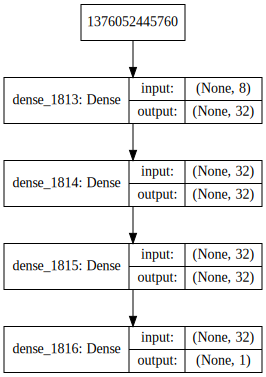

In [47]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_ANN_Best, show_shapes=True).create(prog='dot', format='svg'))